# Exploratory Data Analysis for Predicting Employee Attrition

## Initial imports of libraries and tools

In [1535]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [1289]:
# load the dataset
df = pd.read_csv("../data/IBM_HR_Data_newer.csv")

# set so it displays all columns
pd.set_option('display.max_columns', None)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1290]:
# look at the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [1291]:
# look at the numeric columns
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [1292]:
# check for NAs
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [1293]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [1294]:
# look at values in target 'Attrition'
df.Attrition.unique()

array(['Voluntary Resignation', 'Current employee'], dtype=object)

In [1295]:
# make target column binary
cleanup_att = {"Attrition":     {"Current employee": 0, "Voluntary Resignation": 1}}


In [1296]:
df.replace(cleanup_att, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [1297]:
# drop columns that contain no unique values or that aren't useful for modeling
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Application ID', 'Over18', 'StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [1298]:
# convert 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'PercentSalaryHike', and 'MonthlyIncome' to floats
# to eliminate warning received when adding in categorical features 

In [1299]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype(float)

In [1300]:
df['HourlyRate'] = df['HourlyRate'].astype(float)

In [1301]:
df['JobSatisfaction'] = df['HourlyRate'].astype(float)

In [1302]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)

In [1303]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)

In [1304]:
# identify target/split off target
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [1305]:
# target balance
df.Attrition.value_counts(normalize=True)

0    0.841665
1    0.158335
Name: Attrition, dtype: float64

In [1306]:
# train test split (reminder not to touch test data until the end)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)

In [1307]:
# check shapes
print(X_train.shape, y_train.shape)

(18563, 31) (18563,)


In [1308]:
# isolate numerical columns
X_train_num = X_train.select_dtypes(exclude='object')

In [1309]:
X_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,46.0,706.0,2.0,2.0,4.0,82.0,3.0,3.0,82.0,8578.0,19989.0,3.0,14.0,3.0,3.0,1.0,12.0,4.0,2.0,9.0,8.0,4.0,7.0
14298,35.0,853.0,18.0,5.0,1.0,40.0,2.0,3.0,40.0,9884.0,8302.0,2.0,13.0,3.0,3.0,1.0,10.0,3.0,3.0,4.0,0.0,2.0,3.0
18228,45.0,950.0,28.0,3.0,4.0,99.0,3.0,5.0,99.0,19431.0,15302.0,2.0,13.0,3.0,3.0,0.0,21.0,3.0,2.0,6.0,0.0,1.0,3.0
3827,39.0,1251.0,21.0,4.0,1.0,32.0,1.0,2.0,32.0,5736.0,3987.0,7.0,19.0,3.0,3.0,1.0,10.0,1.0,3.0,3.0,2.0,1.0,2.0
20886,42.0,933.0,19.0,3.0,3.0,79.0,2.0,3.0,79.0,10008.0,12023.0,1.0,14.0,3.0,4.0,0.0,31.0,0.0,2.0,10.0,9.0,5.0,9.0


In [1496]:
# scale numerical data
ss = StandardScaler()
X_tr_sc = pd.DataFrame(ss.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_tr_sc

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056
14298,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320
18228,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320
3827,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415
20886,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,0.121631,-1.570487,-1.011677,0.089184,0.259232,0.749264,0.385196,0.842296,0.749264,0.285369,0.150895,0.529723,-0.331030,-0.426856,1.194451,-0.936913,-0.163593,0.932007,1.755261,-0.985504,-1.166280,-0.678223,-1.155603
12071,1.439824,-1.203171,-0.148512,1.061311,1.170791,-0.578441,0.385196,-0.965176,-0.578441,-0.560408,-0.610664,2.535688,-0.057923,-0.426856,1.194451,0.243801,-0.938612,-0.617207,0.339228,-0.822028,-0.615636,-0.058216,-0.597415
15100,-0.207917,0.045208,1.084582,2.033437,-0.652328,-0.873486,1.793584,-0.061440,-0.873486,-0.277563,1.686251,0.128530,-1.150350,-0.426856,1.194451,-0.936913,0.611426,-0.617207,0.339228,1.466632,2.963548,-0.368220,1.635339
7554,-0.976863,0.139519,0.098107,0.089184,0.259232,-0.332569,0.385196,-0.061440,-0.332569,-0.606028,-0.902403,0.128530,-0.604137,2.342710,1.194451,-0.936913,-0.163593,0.932007,1.755261,0.158826,0.760973,-0.368220,0.798056


In [1497]:
# add in one hot encoded
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.head()


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
13922,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1498]:
# this is the combining databases coded i did with max

X_tr_sc = pd.merge(X_tr_sc, X_t_oh, left_index=True, right_index=True)


In [1499]:
X_tr_sc.shape

(18563, 53)

In [1311]:
# smote the training data (reminder to not smote test data)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_tr_sm, y_tr_sm = smote.fit_sample(X_tr_sc, y_train) 

## First Simple Model
### Logistic regression does not perform very well after tuning several hyper parameters. I will move onto other models.

In [1312]:
# create validation data

In [1263]:
# train val split
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = 0.20, random_state = 2020)

In [1183]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

### trying one hot encode to address  X has 53 features per sample; expecting 23 error when running models on test data

In [1481]:
# one hot encode
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.shape

(18563, 30)

In [1316]:
X_t_sm.shape

(25008, 23)

In [1313]:
# instantiate model
lg = LogisticRegression()

# fit model
lg.fit(X_tr_sm, y_tr_sm)

# check accuracy on training data
lg.score(X_tr_sm, y_tr_sm)

0.6420813901488532

In [1284]:
# check accuracy on validation data
lg.score(X_val, y_val)

0.6288715324535417

In [1285]:
# run F1 score

# test set predictions
pred_lg = lg.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_lg))
print(classification_report(y_t_sm, pred_lg))

[[8014 4490]
 [4214 8290]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     12504
           1       0.65      0.66      0.66     12504

    accuracy                           0.65     25008
   macro avg       0.65      0.65      0.65     25008
weighted avg       0.65      0.65      0.65     25008



In [1188]:
# try tuning different hyper parameters

# instantiate model
lg2 = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear')

# fit model
lg2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg2.score(X_t_sm, y_t_sm)

0.6532709532949457

In [1189]:
# check accuracy on validation data
lg2.score(X_val, y_val)

0.6288715324535417

In [1190]:
# check cross val - commenting out because I already smoted
#cross_val_score(LogisticRegression(), X_tr_sm, y_tr_sm, cv=3, scoring='accuracy')

## Add in categorical features

In [1191]:
# one hot encode
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_tr_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_tr_oh = pd.DataFrame(ohe.fit_transform(X_tr_cat), index= X_tr_cat.index, columns=ohe.get_feature_names(X_tr_cat.columns))
X_tr_oh

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
13922,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12071,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15100,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7554,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1192]:
# join categorical and numerical dataframes
X_tr_final = X_tr_sm.join(X_tr_oh)

In [1193]:
X_tr_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
0,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1194]:
# use nan_to_num to resolve 'ValueError: Input contains NaN, infinity or a value too large for dtype('float32')' 
# when fitting Random Forest model. Not there were no NaNs so I believe it was a float32 issue as others addressed
# the same issue on stackoverflow
X_tr_final[:] = np.nan_to_num(X_tr_final)

## Run models on combined 'X_tr_final' dataset

### Logistic regression modle improves when using combined dataset

In [1195]:
# instantiate model
lg_3 = LogisticRegression()

#fit model
lg_3.fit(X_tr_final, y_tr_sm)

# check accuracy
lg_3.score(X_tr_final, y_tr_sm)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7212355459017441

In [1197]:
# test set predictions
pred_lr = lg_3.predict(X_tr_final)

# confusion matrix and classification report
print(confusion_matrix(y_tr_sm, pred_lr))
print(classification_report(y_tr_sm, pred_lr))

[[11632  4021]
 [ 4706 10947]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73     15653
           1       0.73      0.70      0.71     15653

    accuracy                           0.72     31306
   macro avg       0.72      0.72      0.72     31306
weighted avg       0.72      0.72      0.72     31306



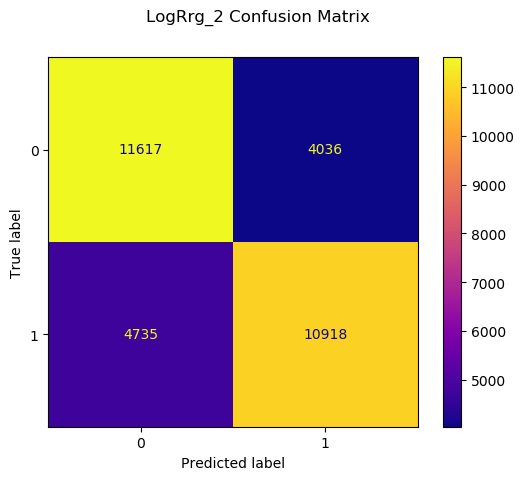

In [1198]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("LogRrg_2 Confusion Matrix ")

plot_confusion_matrix(lg_2, X_tr_final, y_tr_sm, ax=ax, cmap="plasma");

### Use validation data to help tune Logistic Regression Model
#### this technique brought the scores down 

In [1199]:
# train val split
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = .20, random_state = 2020)

In [1276]:
X_t.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
14680,-0.207917,1.050365,-0.271821,1.061311,0.259232,-0.135872,-1.023193,-0.061440,-0.135872,-0.075136,0.675153,-0.673856,-0.877243,-0.426856,0.269089,0.243801,0.353086,0.157400,0.339228,1.139680,2.412904,1.181796,1.077151
8621,-0.098067,-1.580415,-0.888368,-0.882942,0.259232,0.601742,0.385196,-0.965176,0.601742,-0.925582,-1.052492,-0.673856,-1.150350,-0.426856,0.269089,-0.936913,-0.809442,-0.617207,-1.076804,-0.495077,-0.615636,-0.678223,-0.597415
18725,0.121631,1.291106,-1.011677,1.061311,0.259232,-0.135872,0.385196,-0.061440,-0.135872,-0.287748,1.012045,0.529723,0.215184,-0.426856,0.269089,-0.936913,0.094746,0.157400,-1.076804,0.322302,0.760973,1.491800,-0.318320
15568,-0.427616,0.844370,-1.011677,0.089184,0.259232,-1.168532,1.793584,-0.061440,-1.168532,-0.241915,-1.565778,0.529723,1.034504,-0.426856,-1.581634,1.424515,-0.163593,0.157400,0.339228,-0.331601,-0.340315,-0.368220,-0.318320
21150,0.561029,0.328141,2.440985,0.089184,-0.652328,1.585227,0.385196,-0.061440,1.585227,-0.441795,-0.354232,-0.673856,-0.604137,-0.426856,1.194451,0.243801,-0.163593,0.157400,-1.076804,0.322302,1.036295,1.491800,1.077151


In [1200]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

In [1201]:
# check shape
X_t_sm.shape

(25008, 23)

In [1202]:
# instantiate model
lg_4 = LogisticRegression()

# fit model
lg_4.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg_4.score(X_t_sm, y_t_sm)

0.6487923864363404

In [1203]:
# check accuracy on validation data
lg_4.score(X_val, y_val)

0.6237543765149475

In [1205]:
# run F1 score

# test set predictions
pred_lg_4 = lg_4.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_lg_4))
print(classification_report(y_t_sm, pred_lg_4))

[[7962 4542]
 [4241 8263]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64     12504
           1       0.65      0.66      0.65     12504

    accuracy                           0.65     25008
   macro avg       0.65      0.65      0.65     25008
weighted avg       0.65      0.65      0.65     25008



### Decicion Tree

In [1206]:
# instantiate model
dt = tree.DecisionTreeClassifier()
# fit model
dt = dt.fit(X_tr_final, y_tr_sm)
# chdck accuracy
dt.score(X_tr_final, y_tr_sm)

1.0

In [1207]:
# test set predictions
pred_dt = dt.predict(X_tr_final)

# confusion matrix and classification report
print(confusion_matrix(y_tr_sm, pred_dt))
print(classification_report(y_tr_sm, pred_dt))

[[15653     0]
 [    0 15653]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15653
           1       1.00      1.00      1.00     15653

    accuracy                           1.00     31306
   macro avg       1.00      1.00      1.00     31306
weighted avg       1.00      1.00      1.00     31306



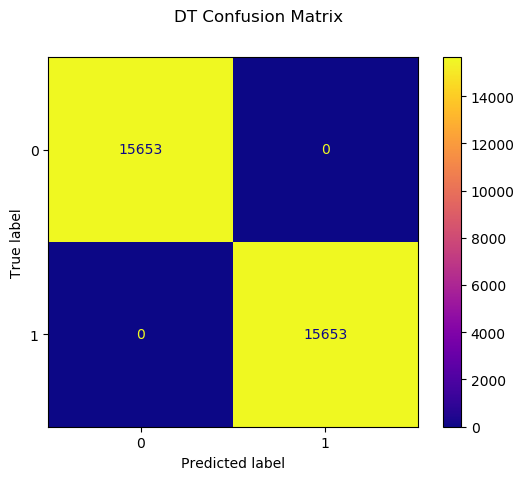

In [1208]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("DT Confusion Matrix ")

plot_confusion_matrix(dt, X_tr_final, y_tr_sm, ax=ax, cmap="plasma");

### Use validation data to help tune Decision Tree Model
#### it is overfitting

In [1209]:
# train val split
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = .20, random_state = 2020)

In [1210]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

In [1211]:
# check shape
X_t_sm.shape

(25008, 23)

In [1212]:
# instantiate model
dt_2 = tree.DecisionTreeClassifier()

# fit model
dt_2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
dt_2.score(X_t_sm, y_t_sm)

1.0

In [1213]:
# check accuracy on validation data
dt_2.score(X_val, y_val)

0.9919202800969567

In [1214]:
# run F1 score

# test set predictions
pred_dt_2 = dt_2.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_dt_2))
print(classification_report(y_t_sm, pred_dt_2))

[[12504     0]
 [    0 12504]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12504
           1       1.00      1.00      1.00     12504

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008



### Support Vector Machine (SVM)

In [845]:
# instantiate model
svm = svm.SVC() # Linear Kernel

# fit model
svm.fit(X_tr_final, y_tr_sm)

# predict the response for test dataset
y_pred = svm.predict(X_test_final)

In [846]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9155354449472096


In [847]:
# test set predictions
pred_svm = svm.predict(X_tr_final)

# confusion matrix and classification report
print(confusion_matrix(y_tr_sm, pred_svm))
print(classification_report(y_tr_sm, pred_svm))

[[14651  1002]
 [  521 15132]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     15653
           1       0.94      0.97      0.95     15653

    accuracy                           0.95     31306
   macro avg       0.95      0.95      0.95     31306
weighted avg       0.95      0.95      0.95     31306



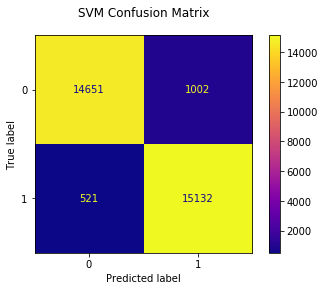

In [848]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Confusion Matrix ")

plot_confusion_matrix(svm, X_tr_final, y_tr_sm, ax=ax, cmap="plasma");

### Use validation data to help tune Support Vector Machine Model
#### it is overfitting

In [1215]:
# train val split
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = .20, random_state = 2020)

In [1216]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

In [1217]:
# check shape
X_t_sm.shape

(25008, 23)

In [1218]:
# instantiate model
svm_2 = svm.SVC() 

# fit model
svm_2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
svm_2.score(X_t_sm, y_t_sm)

0.9531349968010236

In [1219]:
# check accuracy on validation data
svm_2.score(X_val, y_val)

0.9027740371667116

In [1220]:
# run F1 score

# test set predictions
pred_svm_2 = dt_2.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_svm_2))
print(classification_report(y_t_sm, pred_svm_2))

[[12504     0]
 [  146 12358]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12504
           1       1.00      0.99      0.99     12504

    accuracy                           0.99     25008
   macro avg       0.99      0.99      0.99     25008
weighted avg       0.99      0.99      0.99     25008



### Random Forest Classifier

In [1221]:
# instantiate model
rfm = RandomForestClassifier()

# fit model
rfm.fit(X_tr_final, y_tr_sm)

# check accuracy
rfm.score(X_tr_final, y_tr_sm)

1.0

In [1222]:
# test set predictions
pred_rfm = rfm.predict(X_tr_final)

# confusion matrix and classification report
print(confusion_matrix(y_tr_sm, pred_rfm))
print(classification_report(y_tr_sm, pred_rfm))

[[15653     0]
 [    0 15653]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15653
           1       1.00      1.00      1.00     15653

    accuracy                           1.00     31306
   macro avg       1.00      1.00      1.00     31306
weighted avg       1.00      1.00      1.00     31306



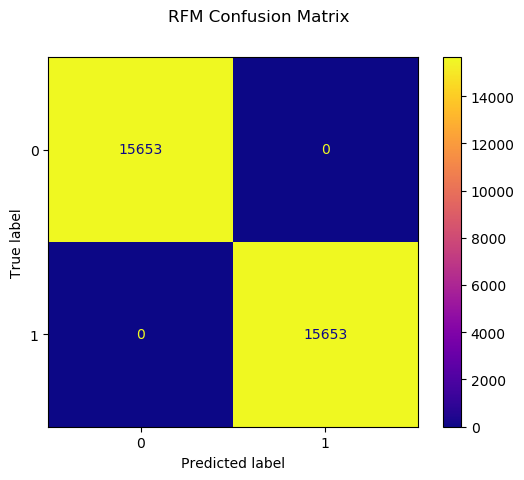

In [1223]:
# plot confusion matrix
fig, ax = plt.subplots()
fig.suptitle("RFM Confusion Matrix ")
plot_confusion_matrix(rfm, X_tr_final, y_tr_sm, ax=ax, cmap="plasma");

In [1224]:
# check auc

# predict class probabilities
prob_y = rfm.predict_proba(X_tr_final)
 
# keep only the positive class
prob_y = [p[1] for p in prob_y]
 
prob_y[:5]

[0.03, 0.07, 0.08, 0.04, 0.97]

In [1225]:
print( roc_auc_score(y_tr_sm, prob_y) )

0.9999999999999999


In [1226]:
# check feature importances
rfm.feature_importances_

array([0.08877634, 0.06546578, 0.04787124, 0.02484376, 0.02149414,
       0.04752962, 0.01789322, 0.01657729, 0.04539582, 0.0546261 ,
       0.04855315, 0.02598433, 0.03620346, 0.00828044, 0.02035273,
       0.03488213, 0.03931439, 0.02817913, 0.01714714, 0.03145551,
       0.03062534, 0.02324743, 0.02771994, 0.00749247, 0.03402793,
       0.02393434, 0.01643102, 0.01590266, 0.00293634, 0.0065282 ,
       0.00107608, 0.00154138, 0.02617417, 0.00108969, 0.00237072,
       0.00168411, 0.00157458, 0.00120918, 0.00248777, 0.0049536 ,
       0.00136102, 0.01214961, 0.01128008, 0.00562863, 0.004766  ,
       0.00168742, 0.00167383, 0.00160202, 0.00180862, 0.00150127,
       0.00042862, 0.00228017, 0.        ])

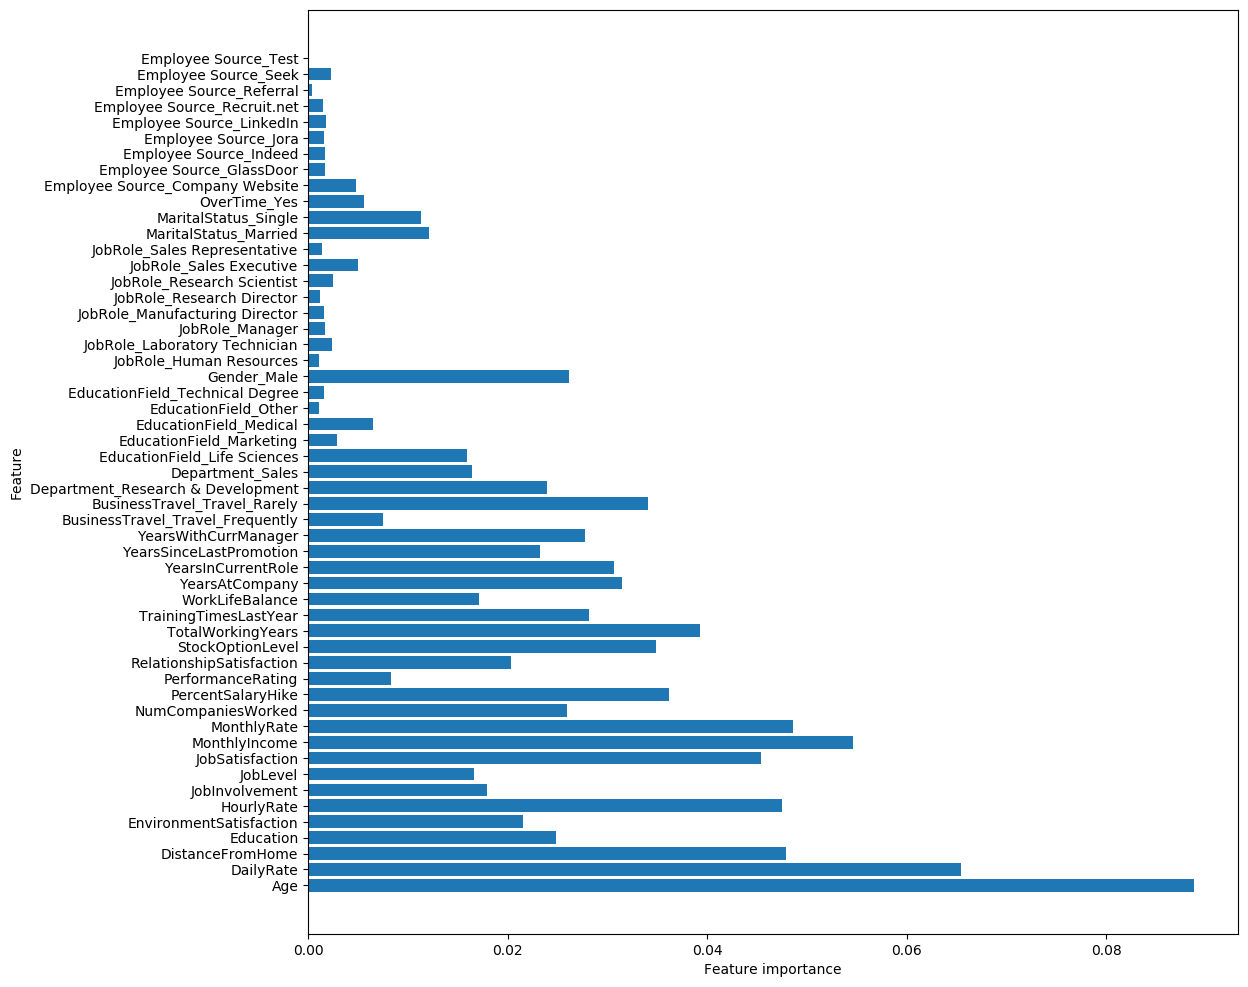

In [1227]:
# build a function to plot feature importances
def plot_feature_importances(model):
    n_features = X_tr_final.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_tr_final.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfm)


In [1228]:
# create list of feature importances 
importances = list(zip(rfm.feature_importances_, X_tr_final.columns))
importances.sort(reverse=True)
importances

[(0.08877634417405922, 'Age'),
 (0.0654657814749669, 'DailyRate'),
 (0.05462609893401226, 'MonthlyIncome'),
 (0.0485531542645499, 'MonthlyRate'),
 (0.047871239477429314, 'DistanceFromHome'),
 (0.0475296233417341, 'HourlyRate'),
 (0.04539582104945555, 'JobSatisfaction'),
 (0.039314393949214675, 'TotalWorkingYears'),
 (0.036203462202578175, 'PercentSalaryHike'),
 (0.03488212970359439, 'StockOptionLevel'),
 (0.03402793250416651, 'BusinessTravel_Travel_Rarely'),
 (0.031455509893283294, 'YearsAtCompany'),
 (0.030625344083570257, 'YearsInCurrentRole'),
 (0.02817913393561316, 'TrainingTimesLastYear'),
 (0.027719937118330408, 'YearsWithCurrManager'),
 (0.026174168435409952, 'Gender_Male'),
 (0.025984334772307924, 'NumCompaniesWorked'),
 (0.024843759389482908, 'Education'),
 (0.02393433774942212, 'Department_Research & Development'),
 (0.02324743432089081, 'YearsSinceLastPromotion'),
 (0.021494135721915286, 'EnvironmentSatisfaction'),
 (0.02035272776017253, 'RelationshipSatisfaction'),
 (0.0178

### Use validation data to help prune the Random Forest Classifier

In [1500]:
# train val split
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = .20, random_state = 2020)

In [1501]:
X_t.shape

(14850, 53)

In [1502]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

In [1503]:
# check shape
X_t_sm.shape

(25008, 53)

In [1504]:
# instantiate model
rfm_2 = RandomForestClassifier()

# fit model
rfm_2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm_2.score(X_t_sm, y_t_sm)

1.0

In [1505]:
# check accuracy on validation data
rfm_2.score(X_val, y_val)

0.9970374360355507

In [1506]:
# run F1 score

# test set predictions
pred_rfm_2 = rfm_2.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_rfm_2))
print(classification_report(y_t_sm, pred_rfm_2))

[[12504     0]
 [    0 12504]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12504
           1       1.00      1.00      1.00     12504

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008



In [1476]:
X_t_sm.shape

(25008, 23)

In [1509]:
# validation testing per max!!!
# run F1 score

# test set predictions
pred_rfm_val = rfm_2.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_val))
print(classification_report(y_val, pred_rfm_val))

[[3148    1]
 [  10  554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       1.00      0.98      0.99       564

    accuracy                           1.00      3713
   macro avg       1.00      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



### Hyperparameter tuning address overfitting

In [1236]:
# RFM 3, change criterion="entropy", max_depth=5

# instantiate model 
rfm_3 = RandomForestClassifier(criterion="entropy", max_depth=5)

# fit model
rfm_3.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm_3.score(X_t_sm, y_t_sm)

0.7762715930902111

In [1237]:
# check accuracy on validation data
rfm_3.score(X_val, y_val)

0.7640721788311339

In [1238]:
# run F1 score

# test set predictions
pred_rfm_3 = rfm_3.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_rfm_3))
print(classification_report(y_t_sm, pred_rfm_3))

[[10042  2462]
 [ 3133  9371]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     12504
           1       0.79      0.75      0.77     12504

    accuracy                           0.78     25008
   macro avg       0.78      0.78      0.78     25008
weighted avg       0.78      0.78      0.78     25008



In [866]:
# RFM 4 - change criterion back to "gini", n_estimators=50, max_depth=50, max_leaf_nodes=500

# instantiate model
rfm_4 = RandomForestClassifier(n_estimators=50, max_depth=50, max_leaf_nodes=500)

# fit model
rfm_4.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm_4.score(X_t_sm, y_t_sm)

0.9951615483045425

In [867]:
# check accuracy on validation data
rfm_4.score(X_val, y_val)

0.9862644761648263

## Use this one as first model in deck before stacking

In [868]:
# run F1 score

# test set predictions
pred_rfm_4 = rfm_4.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_rfm_4))
print(classification_report(y_t_sm, pred_rfm_4))

[[12447    57]
 [   64 12440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12504
           1       1.00      0.99      1.00     12504

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008



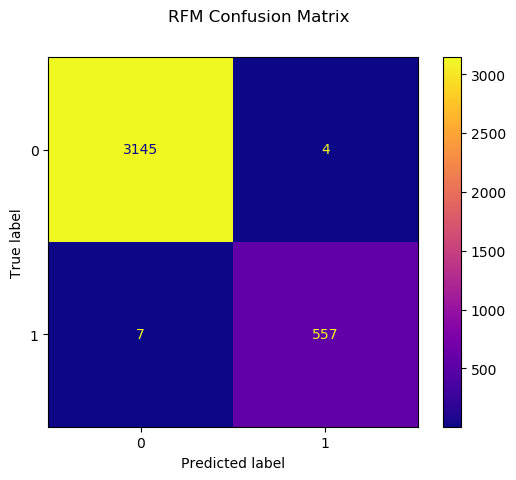

In [1417]:
# plot confusion matrix
fig, ax = plt.subplots()
fig.suptitle("RFM Confusion Matrix ")
plot_confusion_matrix(rfm_5, X_val, y_val, ax=ax, cmap="plasma");

### K Nearest Neighbor (KNN)

In [1239]:
# instantiate model
knn = KNeighborsClassifier()
# fit model
knn = knn.fit(X_tr_final, y_tr_sm)
# check accuracy
knn.score(X_tr_final, y_tr_sm)

0.9864243276049319

In [1240]:
# test set predictions
pred_knn = knn.predict(X_tr_final)

# confusion matrix and classification report
print(confusion_matrix(y_tr_sm, pred_knn))
print(classification_report(y_tr_sm, pred_knn))

[[15232   421]
 [    4 15649]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15653
           1       0.97      1.00      0.99     15653

    accuracy                           0.99     31306
   macro avg       0.99      0.99      0.99     31306
weighted avg       0.99      0.99      0.99     31306



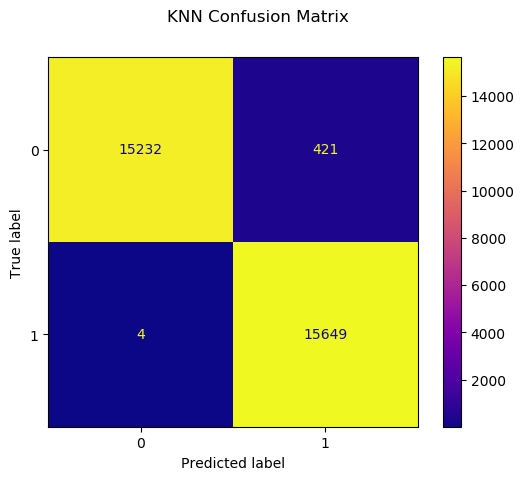

In [1241]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Confusion Matrix ")

plot_confusion_matrix(knn, X_tr_final, y_tr_sm, ax=ax, cmap="plasma");

### Use validation data to better train K Nearest Neighbor (KNN)

In [1242]:
# instantiate model
knn_2 = KNeighborsClassifier()

# fit model
knn_2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
knn_2.score(X_t_sm, y_t_sm)

0.9888435700575816

In [1243]:
# check accuracy on validation data
knn_2.score(X_val, y_val)

0.9558308645300296

In [1244]:
# run F1 score

# test set predictions
pred_knn_2 = knn_2.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_knn_2))
print(classification_report(y_t_sm, pred_knn_2))

[[12233   271]
 [    8 12496]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12504
           1       0.98      1.00      0.99     12504

    accuracy                           0.99     25008
   macro avg       0.99      0.99      0.99     25008
weighted avg       0.99      0.99      0.99     25008



### Hyperparameter tuning to address overfitting

In [1245]:
# KNN 3, change n_neighbors=10, weights='distance', algorithm='kd_tree')

# instantiate model 
knn_3 = KNeighborsClassifier(n_neighbors=15, algorithm='brute')

# fit model
knn_3.fit(X_t_sm, y_t_sm)

# check accuracy on training data
knn_3.score(X_t_sm, y_t_sm)

0.9180262316058861

In [1246]:
# check accuracy on validation data
knn_3.score(X_val, y_val)

0.8346350659843792

In [1247]:
# run F1 score

# test set predictions
pred_knn_3 = knn_3.predict(X_t_sm)

# confusion matrix and classification report
print(confusion_matrix(y_t_sm, pred_knn_3))
print(classification_report(y_t_sm, pred_knn_3))

[[10502  2002]
 [   48 12456]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     12504
           1       0.86      1.00      0.92     12504

    accuracy                           0.92     25008
   macro avg       0.93      0.92      0.92     25008
weighted avg       0.93      0.92      0.92     25008



## Pre-Processing Test Data for Modeling

In [1287]:
# check shapes
print(X_test.shape, y_test.shape)

(4641, 31) (4641,)


In [1268]:
# isolate numerical columns
X_test_num = X_test.select_dtypes(exclude='object')

In [1269]:
X_test_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,41.0,143.0,4.0,3.0,1.0,56.0,3.0,2.0,56.0,9355.0,9558.0,5.0,18.0,3.0,3.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0
15040,35.0,817.0,1.0,3.0,4.0,85.0,3.0,3.0,85.0,17924.0,4544.0,1.0,11.0,3.0,2.0,1.0,9.0,3.0,3.0,4.0,2.0,1.0,3.0
7392,28.0,1476.0,16.0,2.0,2.0,68.0,4.0,2.0,68.0,5661.0,4824.0,0.0,19.0,3.0,3.0,0.0,9.0,2.0,3.0,8.0,3.0,0.0,7.0
3900,30.0,1005.0,3.0,3.0,4.0,88.0,3.0,1.0,88.0,2657.0,8556.0,2.0,11.0,3.0,3.0,0.0,8.0,5.0,3.0,5.0,2.0,0.0,4.0
20988,42.0,269.0,2.0,3.0,4.0,56.0,2.0,1.0,56.0,2593.0,8007.0,1.0,11.0,3.0,3.0,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0


In [1270]:
# scale numerical data
ss = StandardScaler()
X_test_sc = pd.DataFrame(ss.fit_transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)
X_test_sc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593


In [1271]:
# add in categorical features
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe.fit_transform(X_test_cat), index= X_test_cat.index, columns=ohe.get_feature_names(X_test_cat.columns))
X_test_oh.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1272]:
# join categorical and numerical dataframes
X_test_final = X_test_sc.join(X_test_oh)

In [1273]:
X_test_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1477]:
X_test_final.shape

(4641, 53)

In [1478]:
X_tr_sm.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056
1,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320
2,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320
3,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415
4,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245


## Run Models on Test Data

### Logistic Regression

In [1510]:
# accuracy score - once i select my best model refit to the entire training set. 
rfm_2.score(X_test_final, y_test)

0.9179056237879767

In [1475]:
X_test_final.shape

(4641, 53)

In [668]:
# test set predictions
pred_lg_2_test = lg_2.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_lg_2_test))
print(classification_report(y_test, pred_lg_2_test))

[[3562  315]
 [ 620  144]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3877
           1       0.31      0.19      0.24       764

    accuracy                           0.80      4641
   macro avg       0.58      0.55      0.56      4641
weighted avg       0.76      0.80      0.78      4641



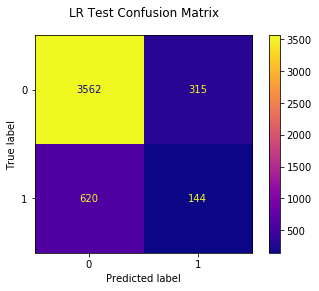

In [669]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("LR Test Confusion Matrix ")

plot_confusion_matrix(lg_2, X_test_final, y_test, ax=ax, cmap="plasma");

### Decision Tree

In [670]:
dt.score(X_test_final, y_test)

0.6901529842706313

In [671]:
# test set predictions
pred_dt_test = dt.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_dt_test))
print(classification_report(y_test, pred_dt_test))

[[2574 1303]
 [ 135  629]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      3877
           1       0.33      0.82      0.47       764

    accuracy                           0.69      4641
   macro avg       0.64      0.74      0.62      4641
weighted avg       0.85      0.69      0.73      4641



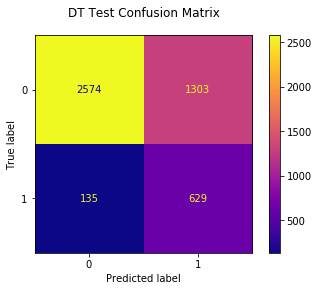

In [672]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("DT Test Confusion Matrix ")

plot_confusion_matrix(dt, X_test_final, y_test, ax=ax, cmap="plasma");

### Support Vector Machine (SVM)

In [673]:
# accuracy score
svm.score(X_test_final, y_test)

0.9144580909286791

In [674]:
# test set predictions
pred = svm.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3657  220]
 [ 177  587]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3877
           1       0.73      0.77      0.75       764

    accuracy                           0.91      4641
   macro avg       0.84      0.86      0.85      4641
weighted avg       0.92      0.91      0.92      4641



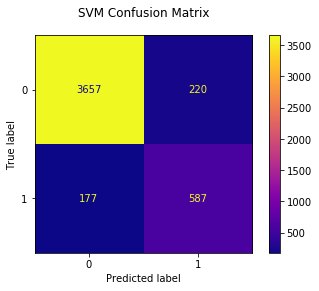

In [675]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Confusion Matrix ")

plot_confusion_matrix(svm, X_test_final, y_test, ax=ax, cmap="plasma");

### Random Forest

In [582]:
# accuracy score
rfm.score(X_test_final, y_test)

0.9592760180995475

In [583]:
# test set predictions
pred = rfm.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3812   65]
 [ 124  640]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3877
           1       0.91      0.84      0.87       764

    accuracy                           0.96      4641
   macro avg       0.94      0.91      0.92      4641
weighted avg       0.96      0.96      0.96      4641



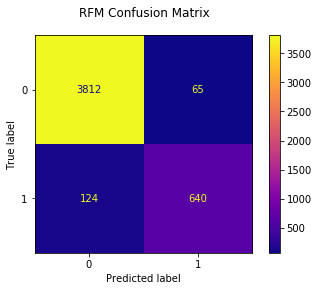

In [584]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("RFM Confusion Matrix ")

plot_confusion_matrix(rfm, X_test_final, y_test, ax=ax, cmap="plasma");

### K Nearest Neighbor (KNN)

In [594]:
knn.score(X_test_final, y_test)

0.9545356604180134

In [595]:
# test set predictions
pred_knn_test = knn.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_knn_test))
print(classification_report(y_test, pred_knn_test))

[[3686  191]
 [  20  744]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3877
           1       0.80      0.97      0.88       764

    accuracy                           0.95      4641
   macro avg       0.90      0.96      0.92      4641
weighted avg       0.96      0.95      0.96      4641



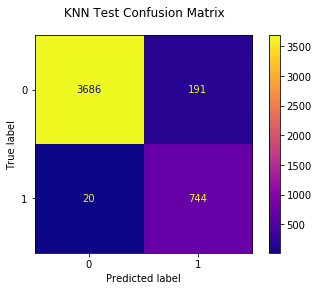

In [596]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Test Confusion Matrix ")

plot_confusion_matrix(knn, X_test_final, y_test, ax=ax, cmap="plasma");

In [1396]:
# RFM 5 - use same parameters as on the stacked model

# instantiate model
rfm_5 = RandomForestClassifier(n_estimators=10, random_state=42)

# fit model
rfm_5.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm_5.score(X_t_sm, y_t_sm)

0.9998000639795266

In [1399]:
# test set predictions
pred_rfm_5_test = rfm_5.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_5_test))
print(classification_report(y_val, pred_rfm_5_test))

[[3145    4]
 [   7  557]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       0.99      0.99      0.99       564

    accuracy                           1.00      3713
   macro avg       1.00      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



## Try stacking

In [1360]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_t, y_t).score(X_val, y_val)

0.9967681120387827

In [1363]:
# test set predictions
pred_clf_test = clf.predict(X_t)

# confusion matrix and classification report
print(confusion_matrix(y_t, pred_clf_test))
print(classification_report(y_t, pred_clf_test))

[[12503     1]
 [    3  2343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12504
           1       1.00      1.00      1.00      2346

    accuracy                           1.00     14850
   macro avg       1.00      1.00      1.00     14850
weighted avg       1.00      1.00      1.00     14850



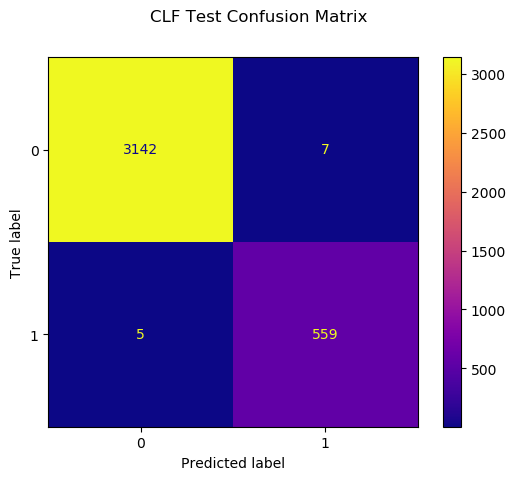

In [1367]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Test Confusion Matrix ")

plot_confusion_matrix(clf, X_val, y_val, ax=ax, cmap="plasma");

In [1534]:

knn.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

## Starting some EDA Visualizations

In [1537]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')


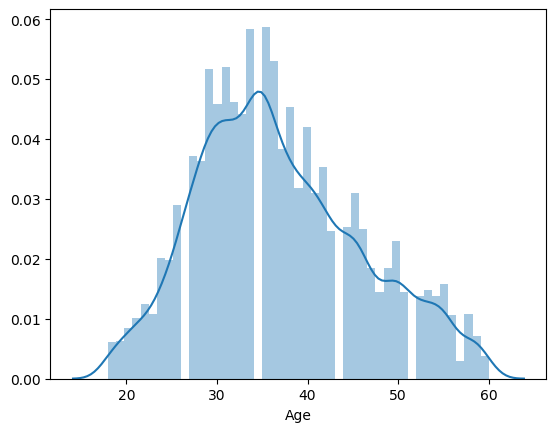

In [1538]:
# start with ages as i expect age to be a factor in attrition
sns.distplot(df['Age'])
plt.show() 

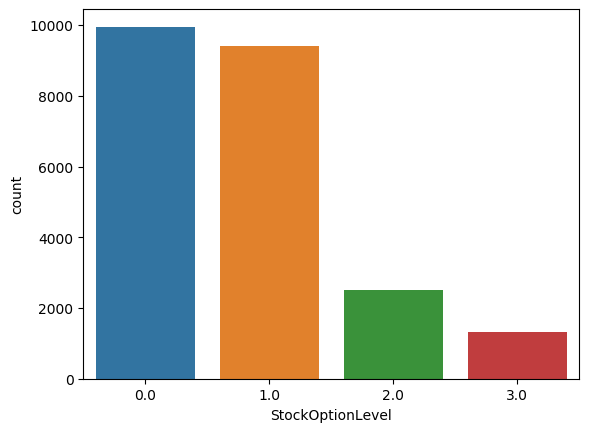

In [1539]:

sns.countplot(df['StockOptionLevel'])
plt.show()

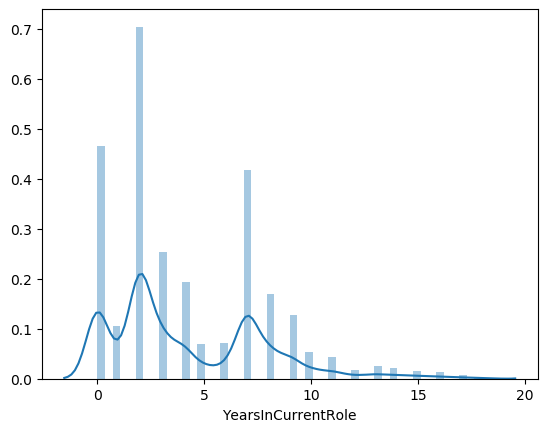

In [1540]:
sns.distplot(df['YearsInCurrentRole'])
plt.show()

In [1541]:
corr = create_corr(df, 'Attrition')
corr

{'Age': -0.1524993238235162,
 'Attrition': 1.0,
 'DailyRate': -0.05769343547906254,
 'DistanceFromHome': 0.07052644844437239,
 'Education': -0.03417312343352907,
 'EnvironmentSatisfaction': -0.04924171006028993,
 'HourlyRate': 0.012129223652489805,
 'JobInvolvement': -0.06737604354573849,
 'JobLevel': -0.08273424625510241,
 'JobSatisfaction': 0.012129223652489805,
 'MonthlyIncome': -0.07702788180842465,
 'MonthlyRate': -0.007610568816593316,
 'NumCompaniesWorked': 0.04139935133037734,
 'PercentSalaryHike': -0.02595416117062345,
 'PerformanceRating': -0.006950960397907871,
 'RelationshipSatisfaction': -0.006423341505976501,
 'StockOptionLevel': -0.09395634583604931,
 'TotalWorkingYears': -0.08283863982056681,
 'TrainingTimesLastYear': -0.047668133022653165,
 'WorkLifeBalance': -0.026016453565418717,
 'YearsAtCompany': -0.06160342810031566,
 'YearsInCurrentRole': -0.08587435422465385,
 'YearsSinceLastPromotion': -0.019883821079532366,
 'YearsWithCurrManager': -0.0668372764179082}

In [1542]:
def create_corr(df, target, min_percent=0.12):
    corr = df.corr()[target]
    corr=dict(corr)
    return corr

corr

{'Age': -0.1524993238235162,
 'Attrition': 1.0,
 'DailyRate': -0.05769343547906254,
 'DistanceFromHome': 0.07052644844437239,
 'Education': -0.03417312343352907,
 'EnvironmentSatisfaction': -0.04924171006028993,
 'HourlyRate': 0.012129223652489805,
 'JobInvolvement': -0.06737604354573849,
 'JobLevel': -0.08273424625510241,
 'JobSatisfaction': 0.012129223652489805,
 'MonthlyIncome': -0.07702788180842465,
 'MonthlyRate': -0.007610568816593316,
 'NumCompaniesWorked': 0.04139935133037734,
 'PercentSalaryHike': -0.02595416117062345,
 'PerformanceRating': -0.006950960397907871,
 'RelationshipSatisfaction': -0.006423341505976501,
 'StockOptionLevel': -0.09395634583604931,
 'TotalWorkingYears': -0.08283863982056681,
 'TrainingTimesLastYear': -0.047668133022653165,
 'WorkLifeBalance': -0.026016453565418717,
 'YearsAtCompany': -0.06160342810031566,
 'YearsInCurrentRole': -0.08587435422465385,
 'YearsSinceLastPromotion': -0.019883821079532366,
 'YearsWithCurrManager': -0.0668372764179082}

In [1543]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

['Age', 'Stockoptionlevel', 'Yearsincurrentrole', 'Totalworkingyears', 'Joblevel']
[15.24993238235162, 9.39563458360493, 8.587435422465385, 8.283863982056682, 8.273424625510241]


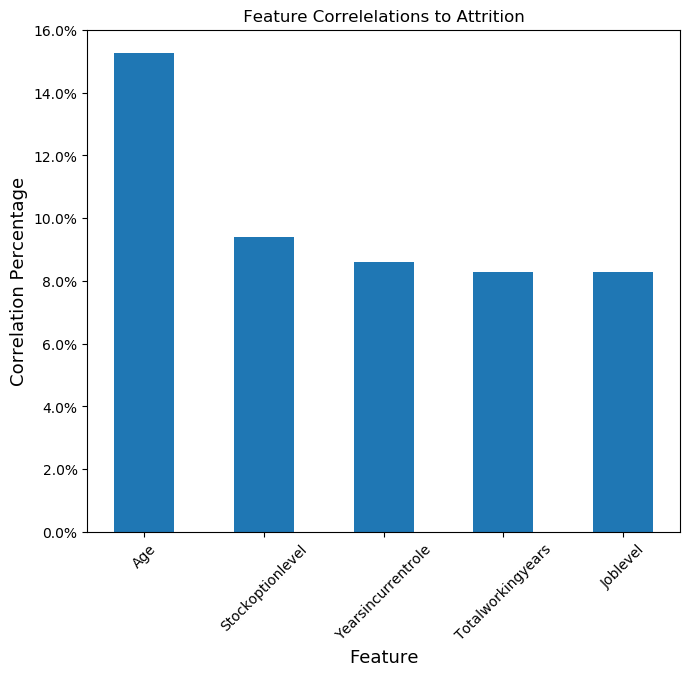

In [1395]:
create_plot_of_feature_importances(corr, title='Feature Correlelations to Attrition', top_num=5, width=0.5, percent=True);
plt.xticks(rotation=45);
plt.savefig("test", facecolor=fig.get_facecolor(), transparent=True)

In [1065]:
print(X_tr_sc.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [945]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Technical Degree' 'Medical' 'Marketing' 'Other'
 'Human Resources' 'Test']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Manager' 'Research Director' 'Sales Representative'
 'Laboratory Technician' 'Research Scientist' 'Manufacturing Director'
 'Healthcare Representative' 'Human Resources']
MaritalStatus : ['Single' 'Divorced' 'Married']
OverTime : ['Yes' 'No']
Employee Source : ['Referral' 'Company Website' 'Indeed' 'GlassDoor' 'LinkedIn' 'Adzuna'
 'Seek' 'Recruit.net' 'Jora' 'Test']


In [946]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

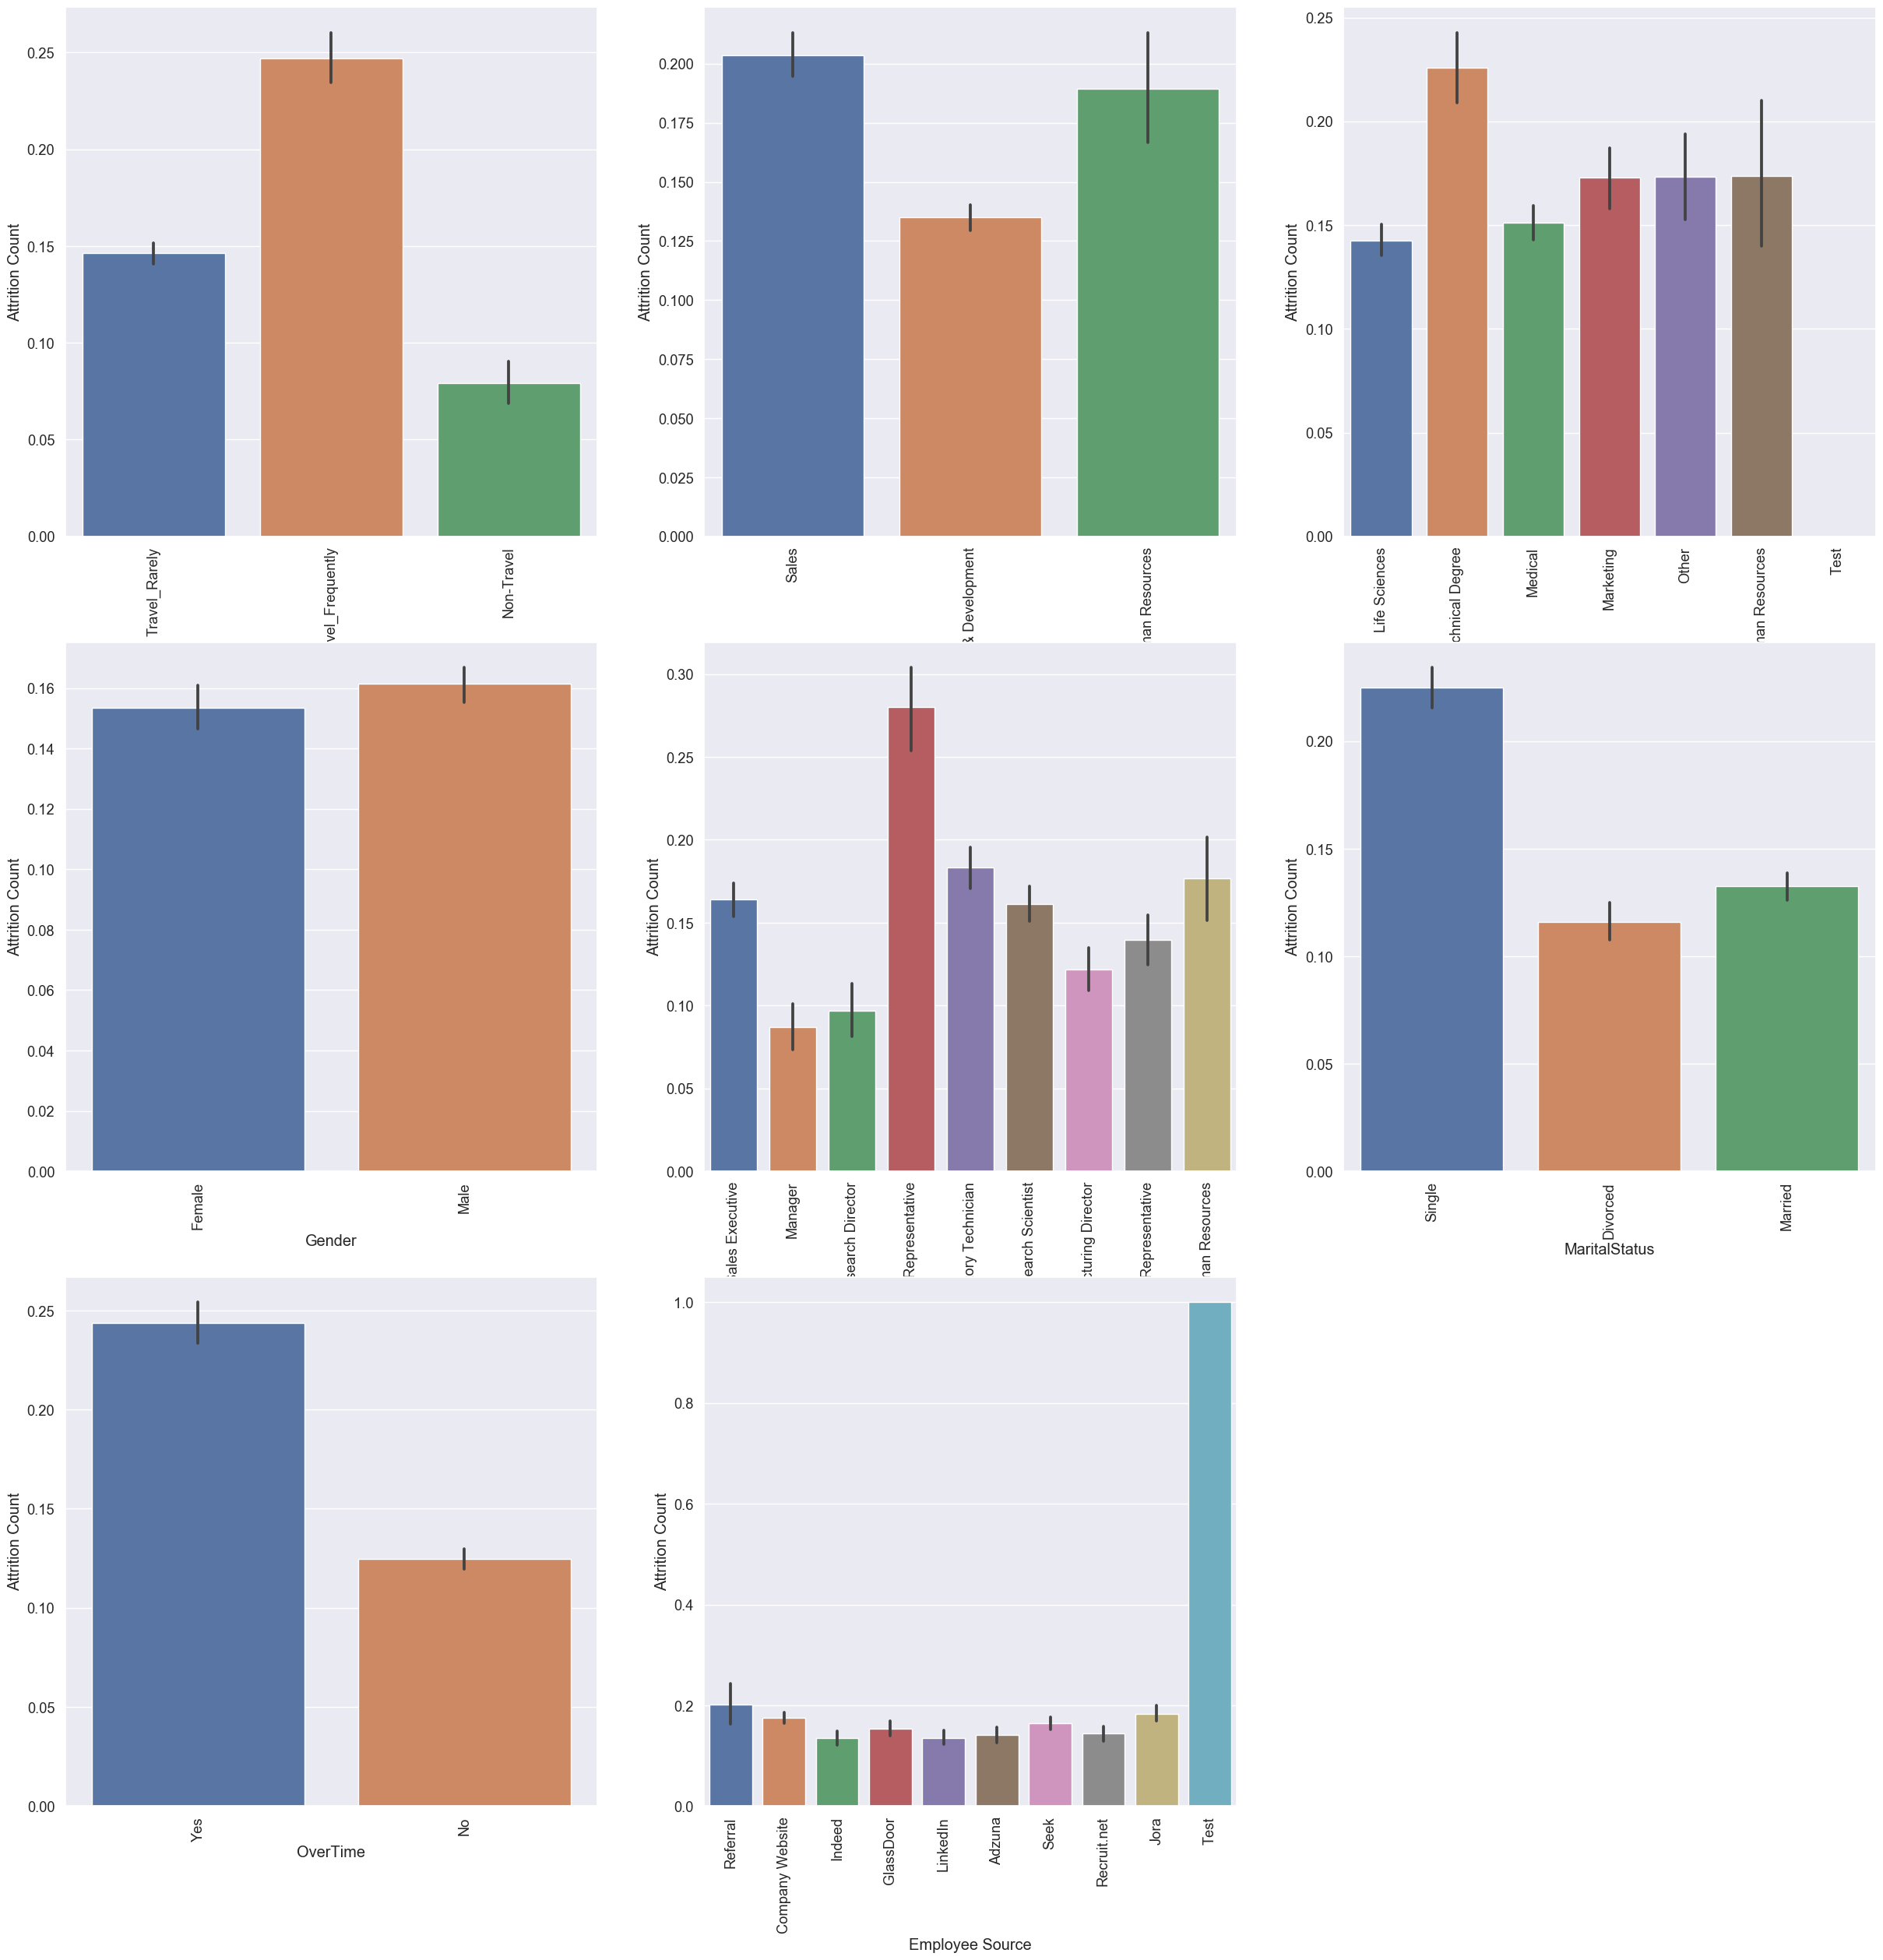

In [947]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

In [988]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,94.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,94.0,Single,5993.0,19479.0,4.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,94.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,94.0,Single,5993.0,19479.0,4.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,94.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [989]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1. 12. 20.  2.  4.  5. 22.  3. 10.  9. 14.  6. 19.  7. 23. 28.  8. 18.
 11. 21. 25. 16. 13. 24. 27. 15. 26. 29. 17.]
Education : [2. 3. 4. 1. 5.]
EnvironmentSatisfaction : [2. 4. 1. 3.]
JobInvolvement : [3. 2. 1. 4.]
JobLevel : [2. 4. 5. 1. 3.]
NumCompaniesWorked : [8. 4. 2. 5. 0. 1. 9. 3. 6. 7.]
PercentSalaryHike : [11. 14. 12. 22. 18. 13. 17. 23. 20. 19. 16. 15. 21. 24. 25.]
PerformanceRating : [3. 4.]
RelationshipSatisfaction : [1. 3. 4. 2.]
StockOptionLevel : [0. 3. 1. 2.]
TrainingTimesLastYear : [0. 2. 5. 3. 1. 4. 6.]
WorkLifeBalance : [1. 3. 2. 4.]
YearsInCurrentRole : [ 4.  0.  8.  7. 15.  3.  2.  6. 10.  9. 16. 13.  1. 14.  5. 12. 11. 17.
 18.]
YearsSinceLastPromotion : [ 0. 11.  4. 15.  7. 14.  1.  3.  2.  9. 12.  5. 13.  8.  6. 10.]
YearsWithCurrManager : [ 5.  2. 10.  8.  0.  7.  3.  4.  6.  1. 17. 11.  9. 12. 14. 13. 16. 15.]


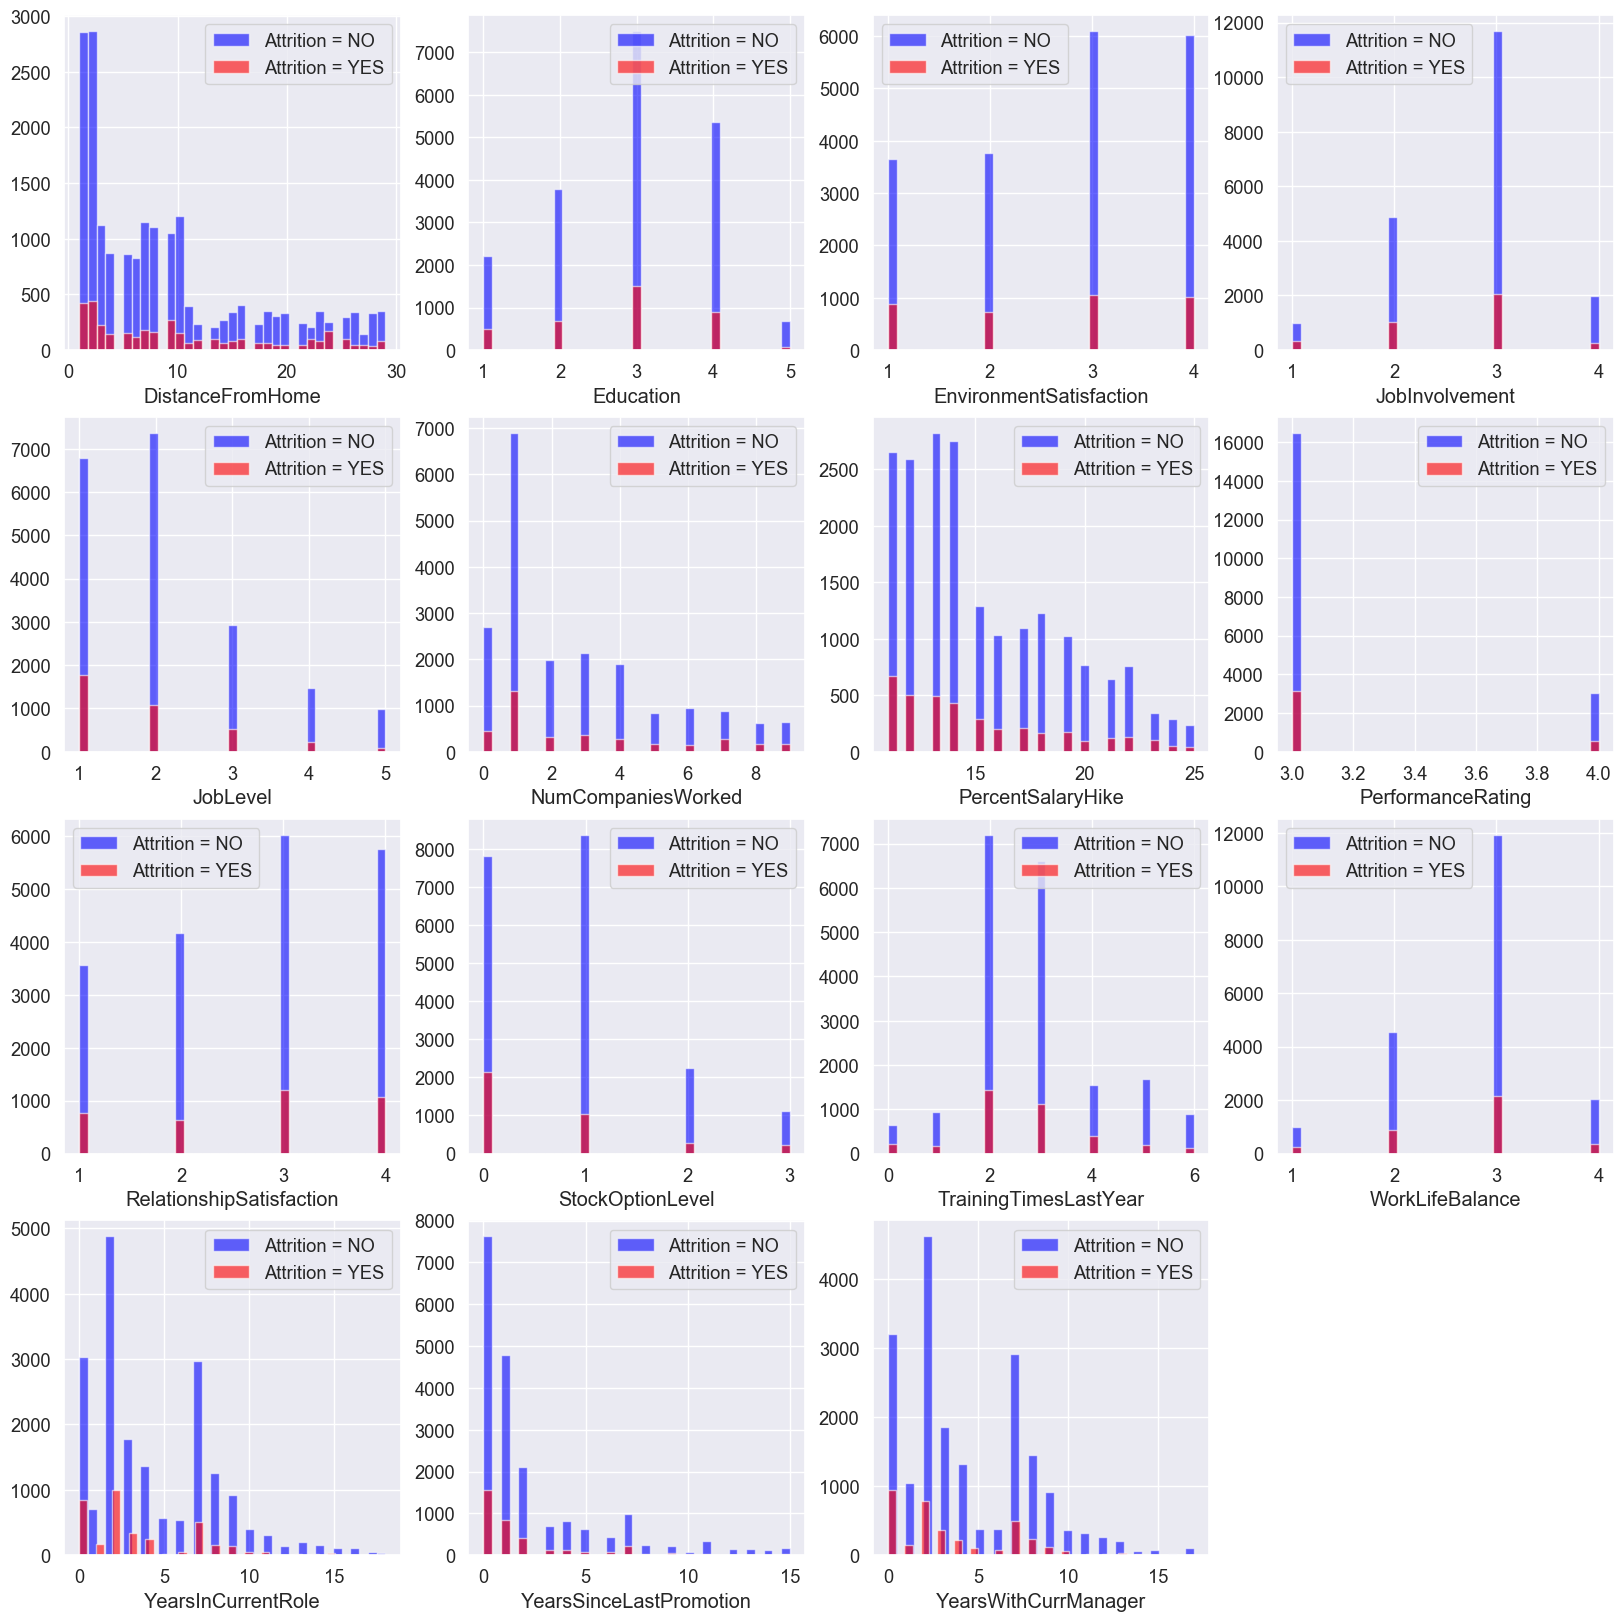

In [990]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [992]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18.0, Maximum: 60.0
DailyRate : Minimum: 102.0, Maximum: 1499.0
HourlyRate : Minimum: 30.0, Maximum: 100.0
JobSatisfaction : Minimum: 30.0, Maximum: 100.0
MonthlyIncome : Minimum: 1009.0, Maximum: 19999.0
MonthlyRate : Minimum: 2094.0, Maximum: 26999.0
TotalWorkingYears : Minimum: 0.0, Maximum: 40.0
YearsAtCompany : Minimum: 0.0, Maximum: 40.0


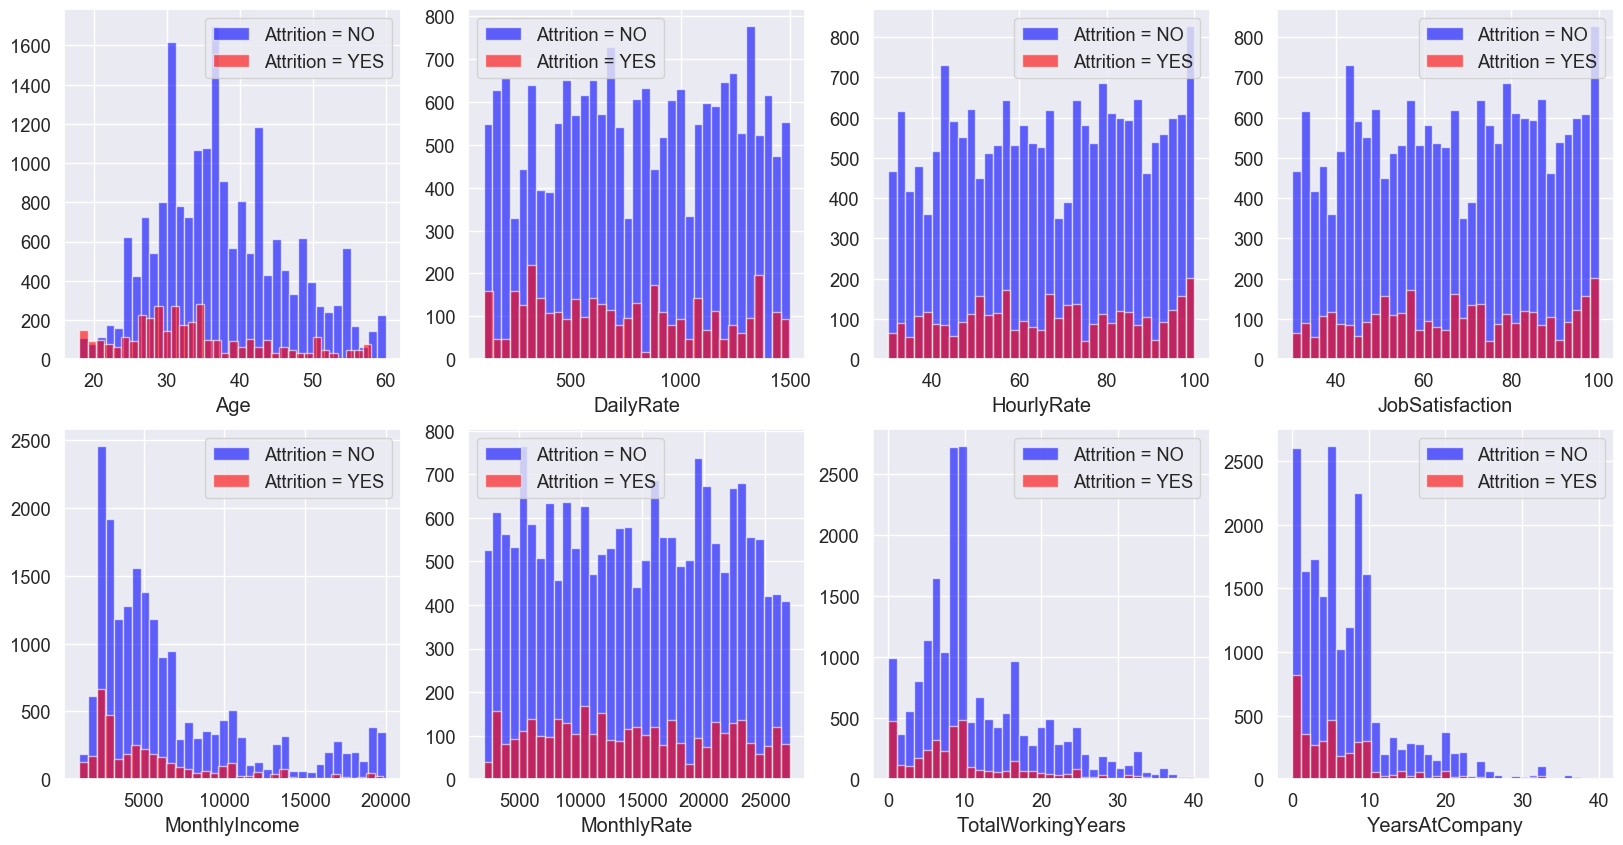

In [993]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

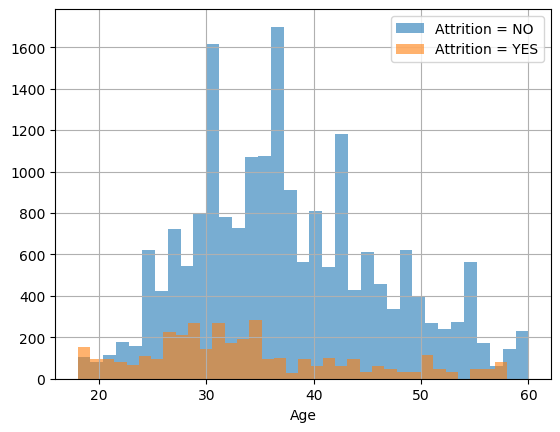

In [1464]:
#plt.figure(figsize=(20, 10))

#for i, column in enumerate(cont_col, 1):
  #  plt.subplot(2, 4, i)
df[df["Attrition"] == 0]['Age'].hist(bins=35,label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['Age'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('Age');
plt.savefig('dist_age.png', transparent=True);

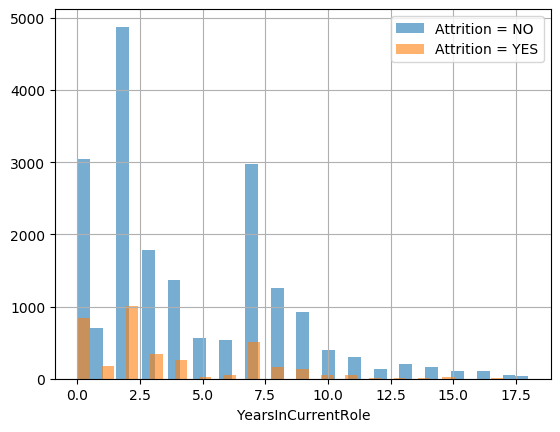

In [1527]:
df[df["Attrition"] == 0]['YearsInCurrentRole'].hist(bins=35, label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['YearsInCurrentRole'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('YearsInCurrentRole');
plt.savefig('dist_years_role.png', transparent=True);

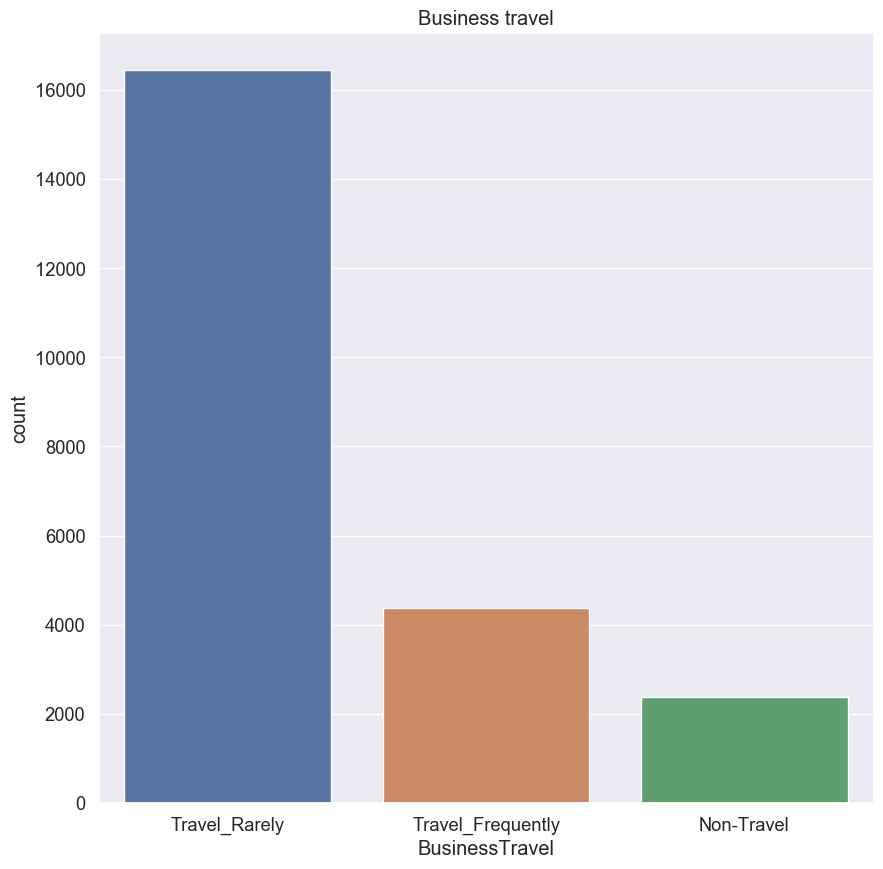

In [995]:
sns.countplot(df['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel');

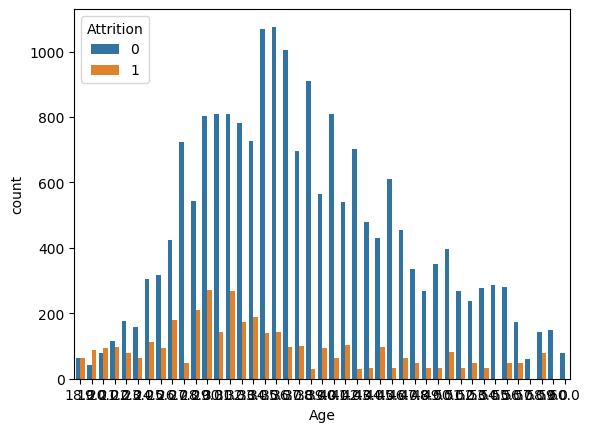

In [1517]:
column = ["Age"]
ax = sns.countplot(data=df,x="Age",hue="Attrition")


In [ ]:
#total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j==7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

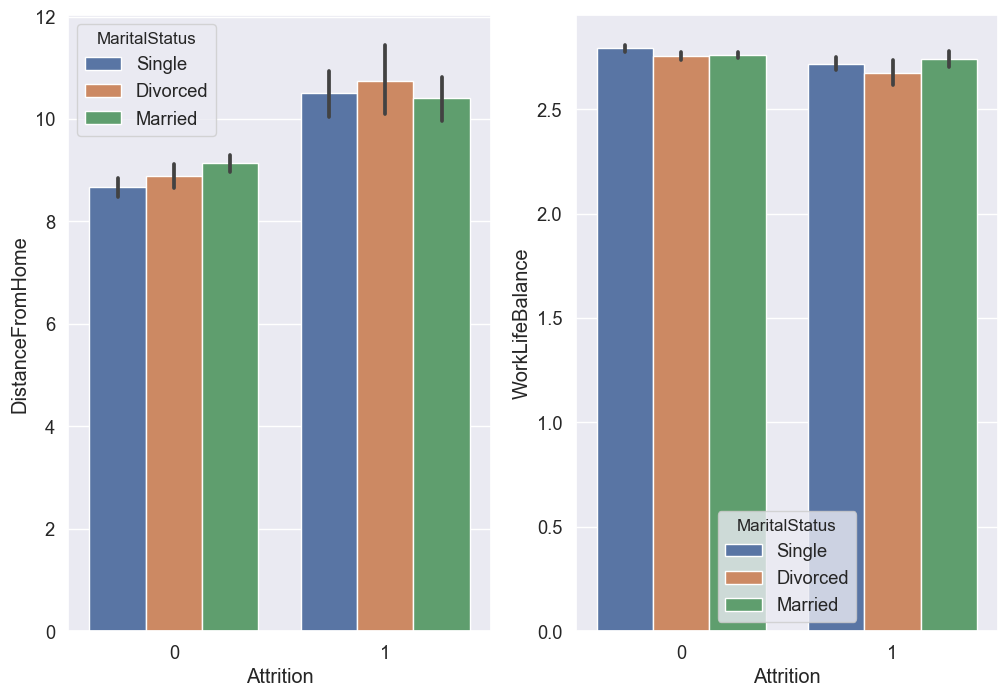

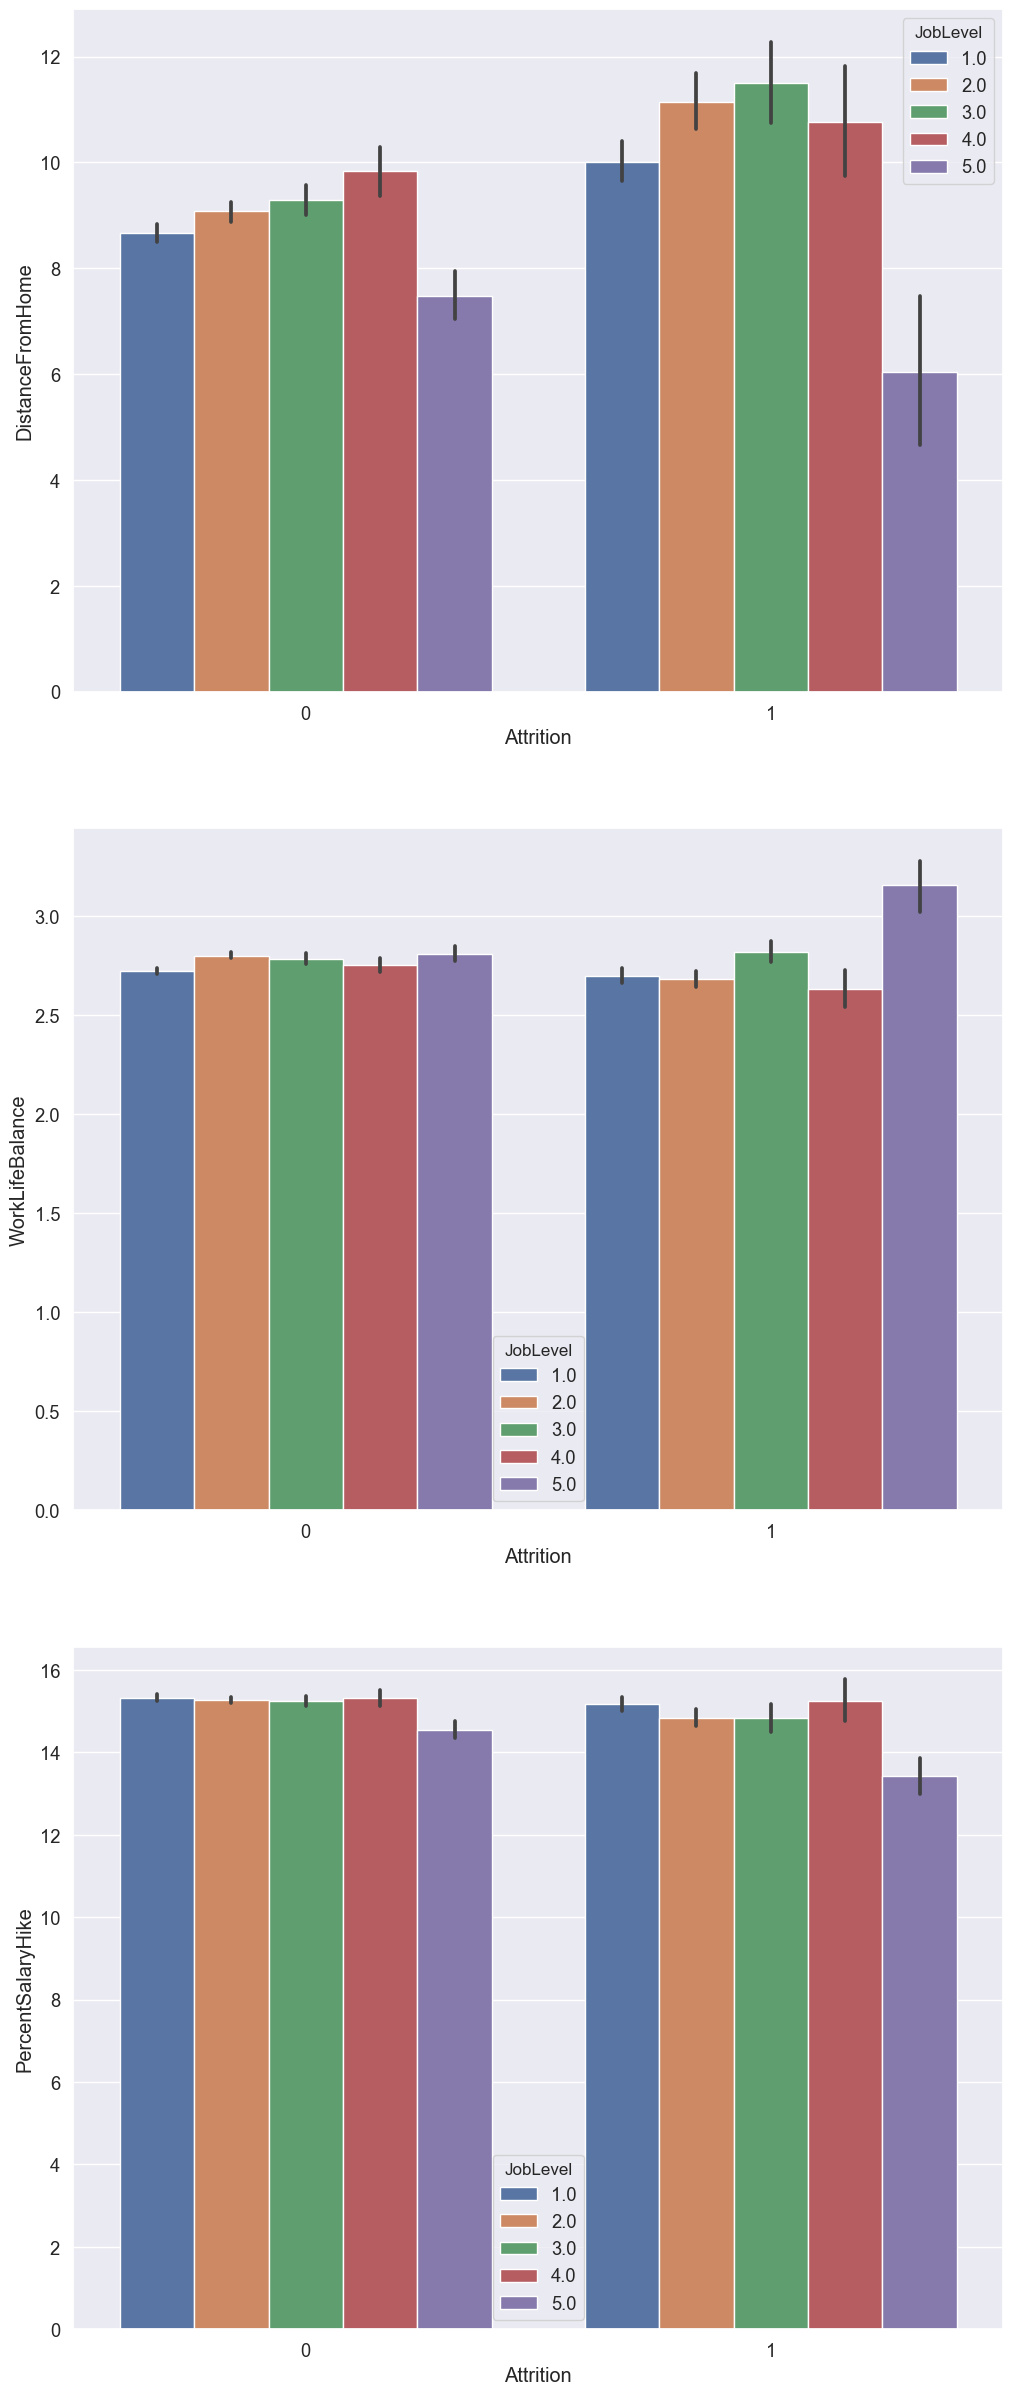

In [1012]:
# MaritalStatus wise
columns = ["DistanceFromHome",
"WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = df[i], hue="MaritalStatus", data =df)

#plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

#JobLevel wise
columns = ["DistanceFromHome",
"WorkLifeBalance",
"PercentSalaryHike"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(3,1,j)
    sns.barplot(x = 'Attrition', y = df[i], hue="JobLevel", data =df)

plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

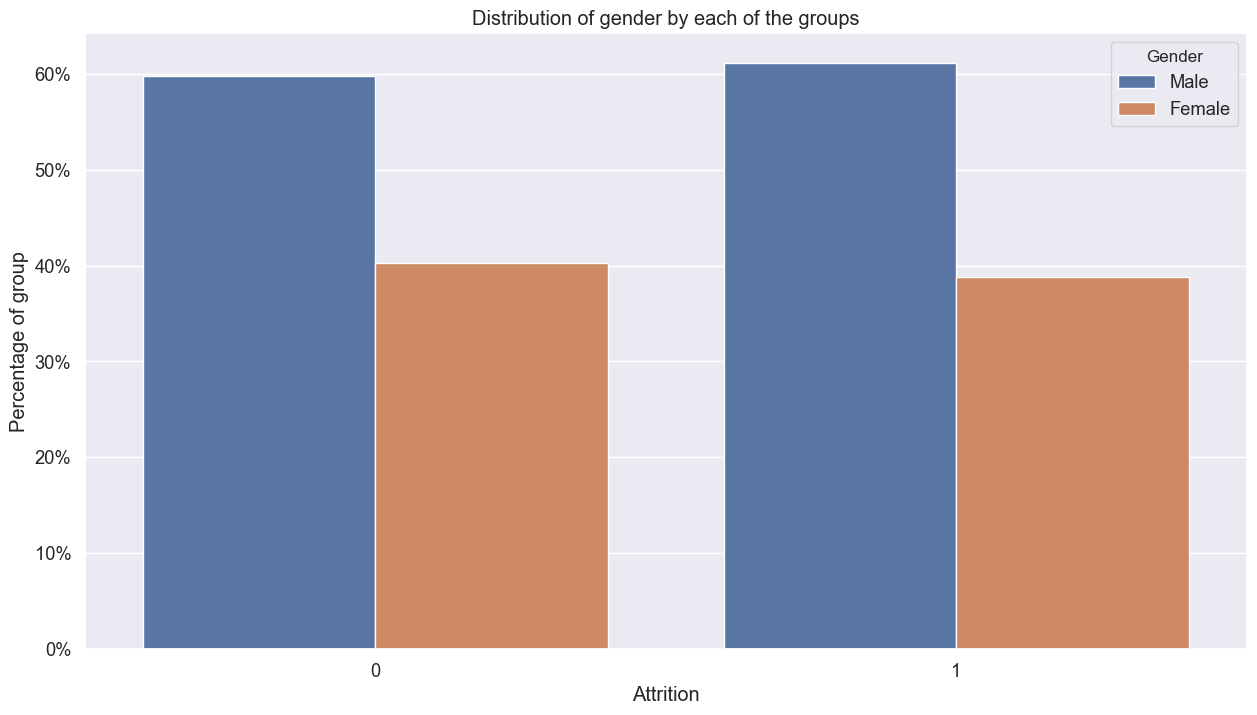

In [1015]:
f,ax = plt.subplots(figsize=(15,8))

# Get the proportion of the genders grouped by the attrition status
grouped_data = df["Gender"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()

# Plot the result
sns.barplot(x = "Attrition", y = "Percentage of group", hue = "Gender", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of gender by each of the groups")
plt.show()

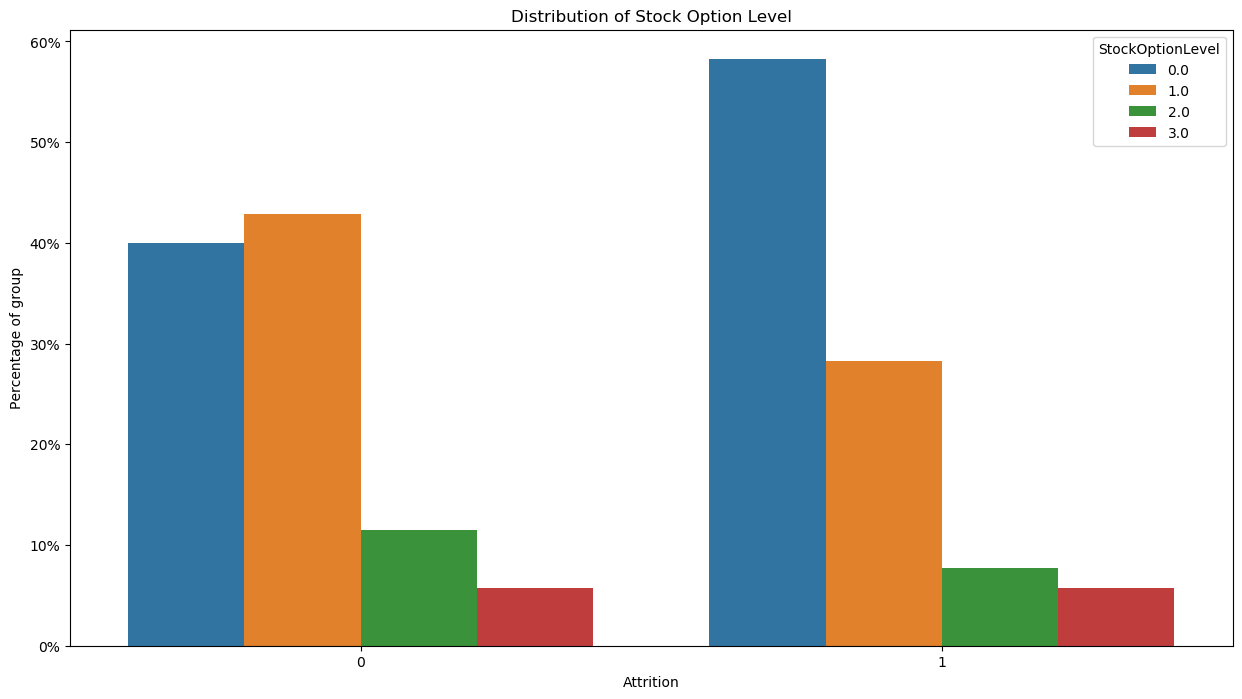

In [1518]:
f,ax = plt.subplots(figsize=(15,8))

# Get the proportion of the genders grouped by the attrition status
grouped_data = df["StockOptionLevel"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()

# Plot the result
sns.barplot(x = "Attrition", y = "Percentage of group", hue = "StockOptionLevel", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of Stock Option Level")
plt.show()

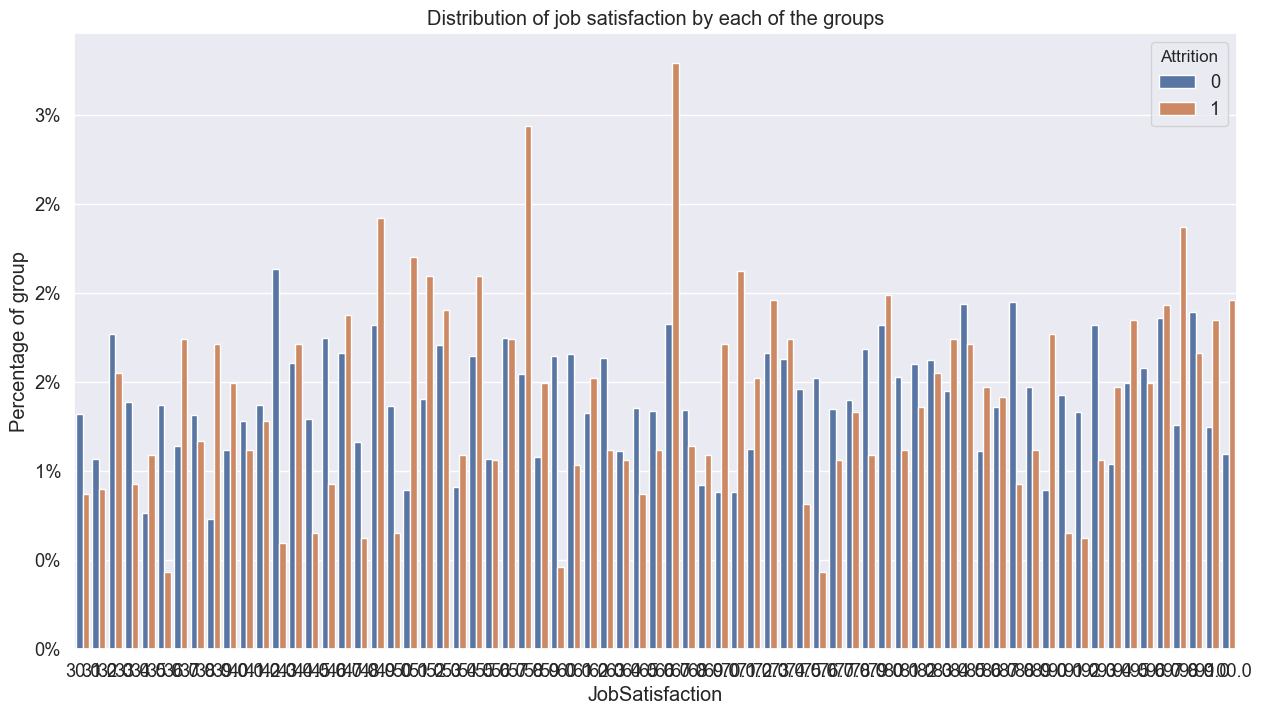

In [1016]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["JobSatisfaction"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "JobSatisfaction", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of job satisfaction by each of the groups")
plt.show()

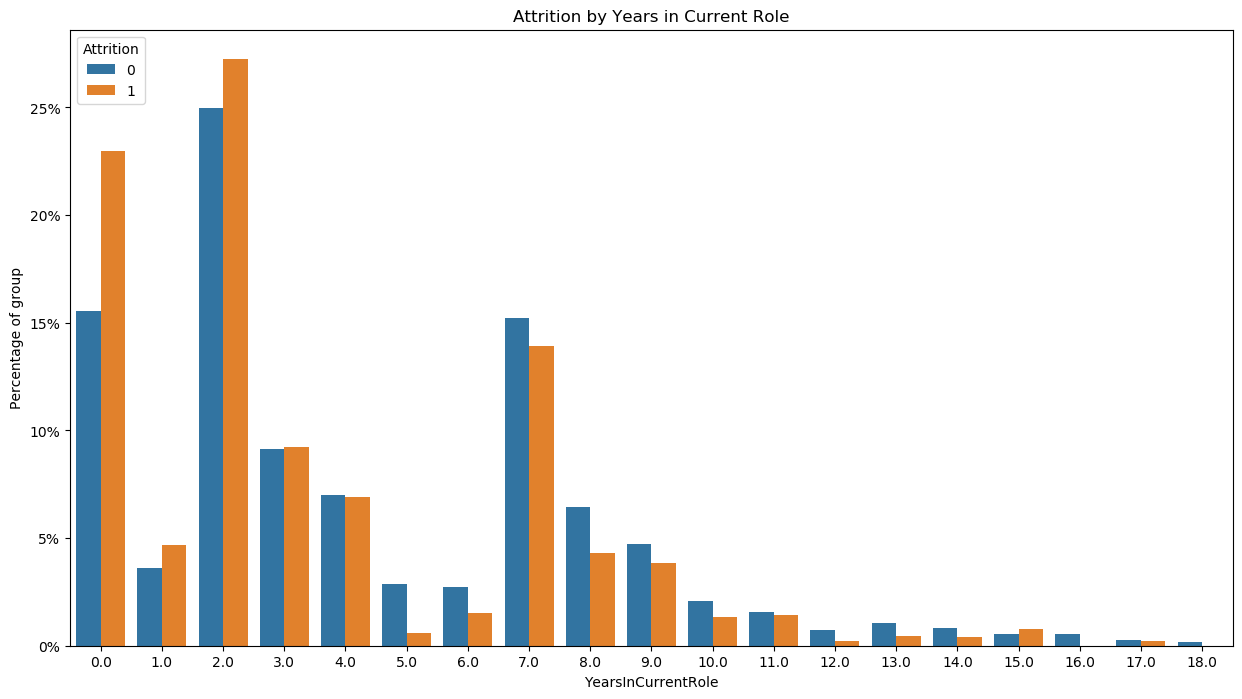

<Figure size 640x480 with 0 Axes>

In [1468]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["YearsInCurrentRole"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "YearsInCurrentRole", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Attrition by Years in Current Role")
plt.show()
plt.savefig('dist_years_role.png', transparent=True);

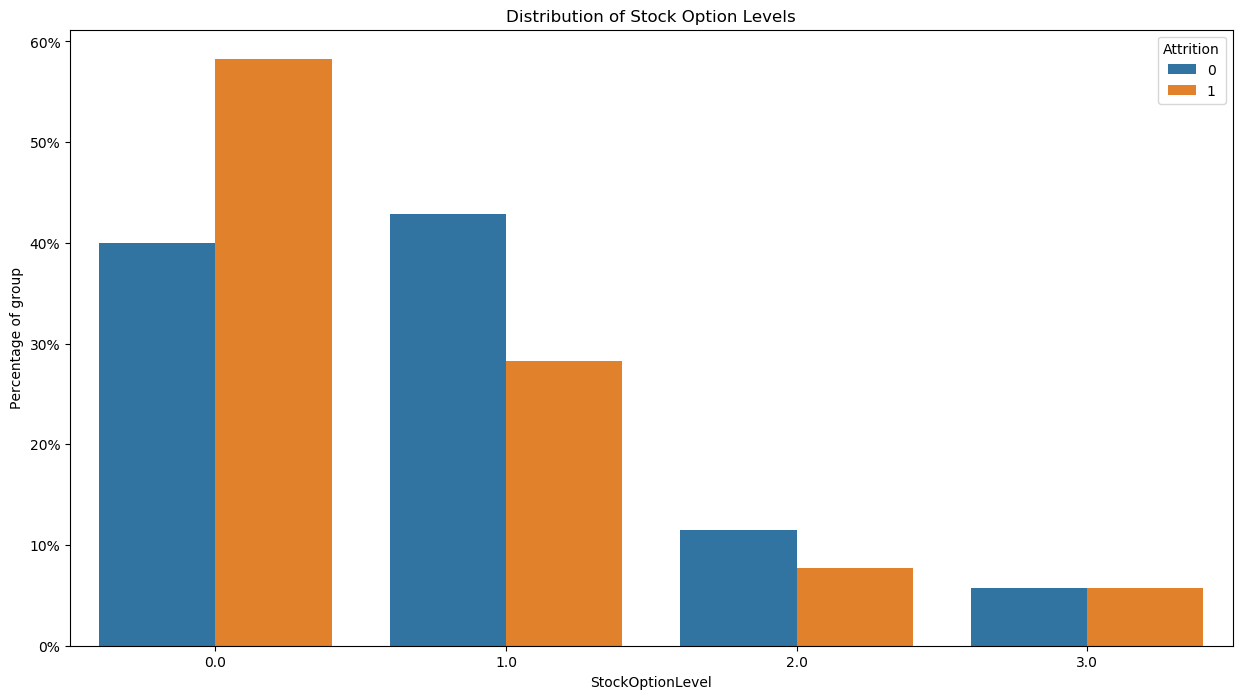

<Figure size 640x480 with 0 Axes>

In [1519]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["StockOptionLevel"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "StockOptionLevel", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of Stock Option Levels")
plt.show()
plt.savefig('dist_stock.png', transparent=True);

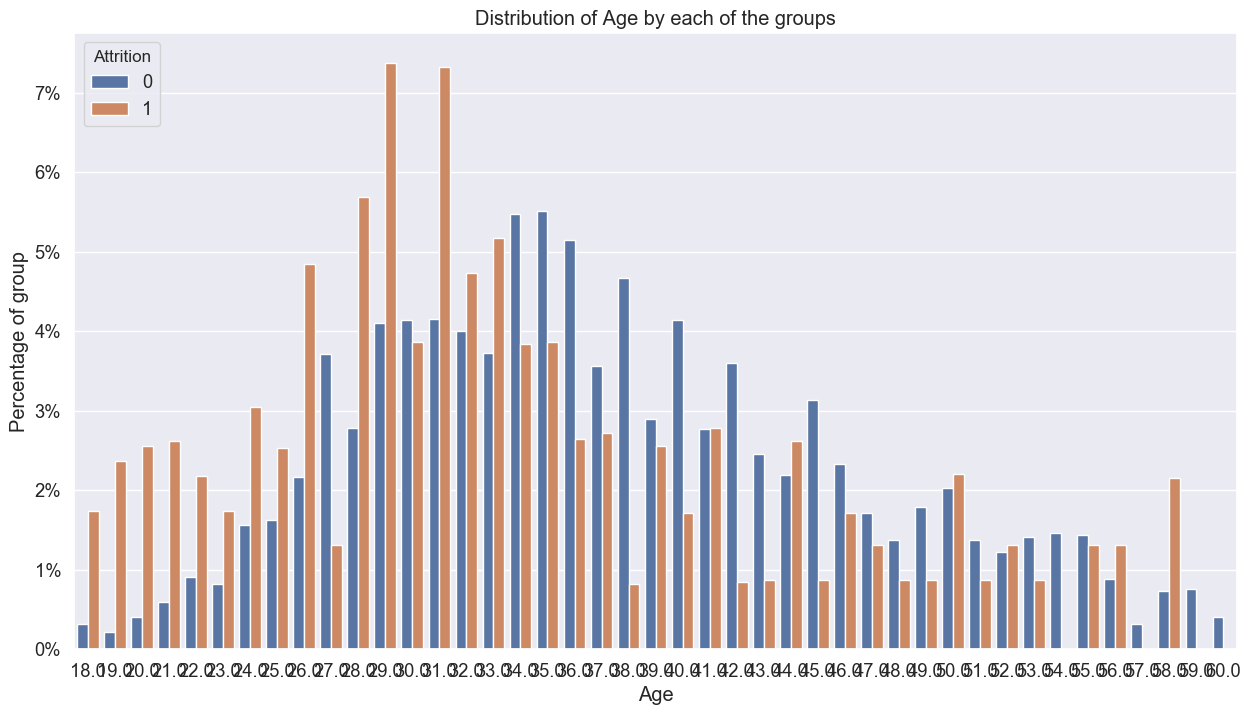

In [1018]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["Age"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "Age", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of Age by each of the groups")
plt.show()

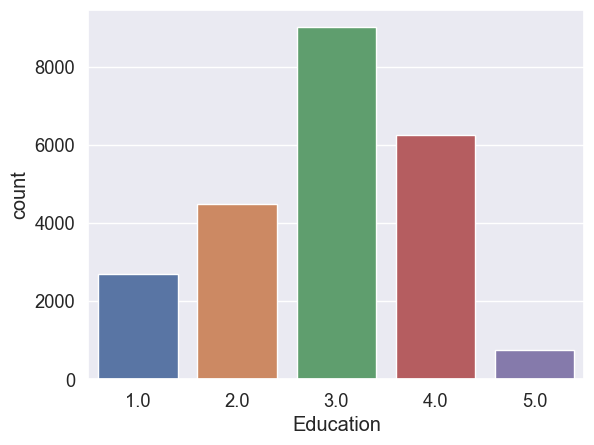

In [1021]:
sns.countplot(df.Education);

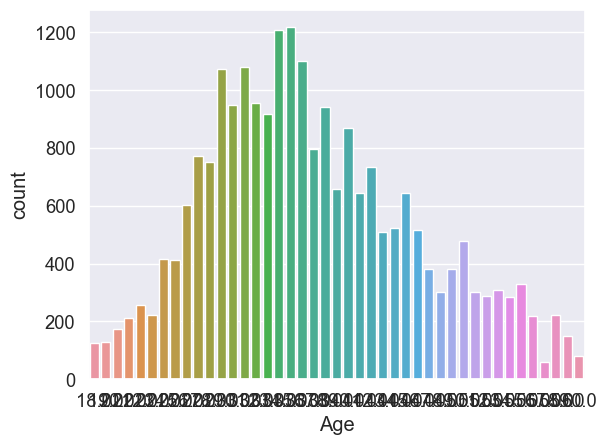

In [1023]:
sns.countplot(df.Age)

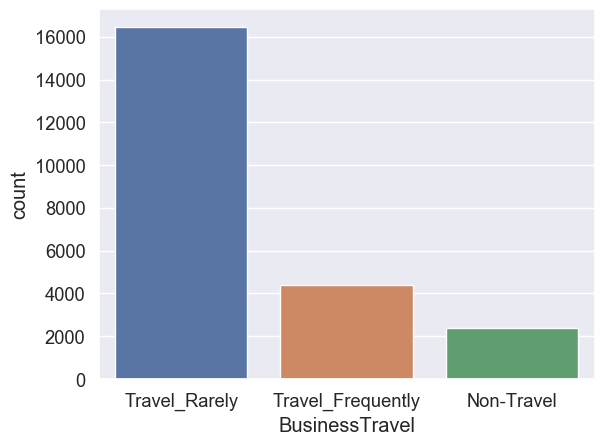

In [1026]:
sns.countplot(df.BusinessTravel);

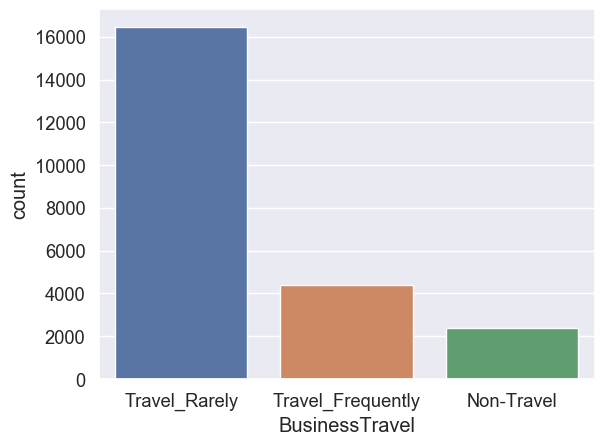

In [1038]:
sns.countplot(df.BusinessTravel);

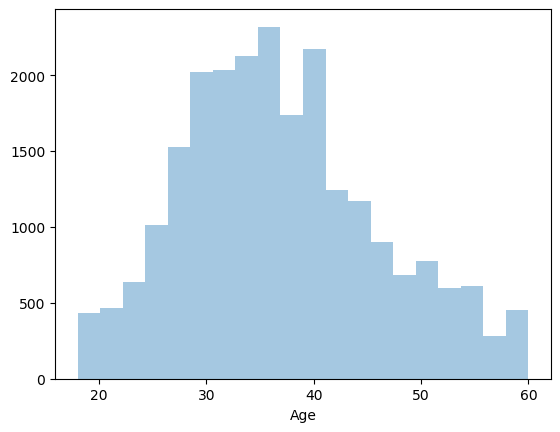

In [1459]:
age1=df['Age']
sns.distplot(age1,bins=20,kde=False)
plt.show()

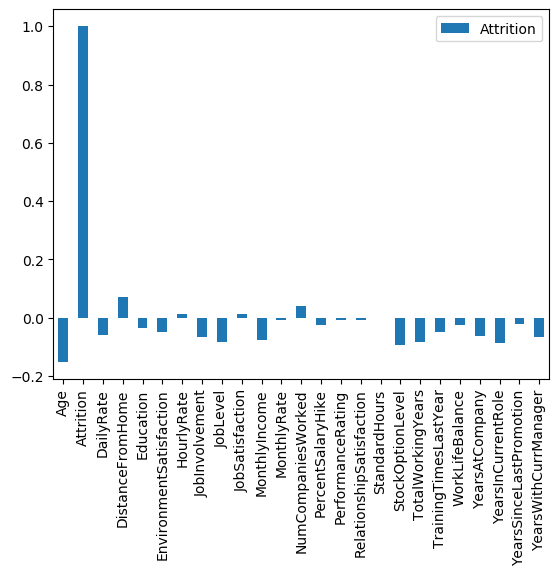

In [927]:
df_corr = df.corr()
df_corr[['Attrition']].plot(kind='bar')

In [906]:
df[df.columns[1:]].corr()['Attrition'][:]

Attrition                   1.000000
DailyRate                  -0.057693
DistanceFromHome            0.070526
Education                  -0.034173
EnvironmentSatisfaction    -0.049242
HourlyRate                  0.012129
JobInvolvement             -0.067376
JobLevel                   -0.082734
JobSatisfaction             0.012129
MonthlyIncome              -0.077028
MonthlyRate                -0.007611
NumCompaniesWorked          0.041399
PercentSalaryHike          -0.025954
PerformanceRating          -0.006951
RelationshipSatisfaction   -0.006423
StandardHours                    NaN
StockOptionLevel           -0.093956
TotalWorkingYears          -0.082839
TrainingTimesLastYear      -0.047668
WorkLifeBalance            -0.026016
YearsAtCompany             -0.061603
YearsInCurrentRole         -0.085874
YearsSinceLastPromotion    -0.019884
YearsWithCurrManager       -0.066837
Name: Attrition, dtype: float64

In [934]:
corr = create_corr(df, 'Attrition')
corr

{'Age': -0.1524993238235162,
 'Attrition': 1.0,
 'DailyRate': -0.05769343547906254,
 'DistanceFromHome': 0.07052644844437239,
 'Education': -0.03417312343352907,
 'EnvironmentSatisfaction': -0.04924171006028993,
 'HourlyRate': 0.012129223652489805,
 'JobInvolvement': -0.06737604354573849,
 'JobLevel': -0.08273424625510241,
 'JobSatisfaction': 0.012129223652489805,
 'MonthlyIncome': -0.07702788180842465,
 'MonthlyRate': -0.007610568816593316,
 'NumCompaniesWorked': 0.04139935133037734,
 'PercentSalaryHike': -0.02595416117062345,
 'PerformanceRating': -0.006950960397907871,
 'RelationshipSatisfaction': -0.006423341505976501,
 'StandardHours': nan,
 'StockOptionLevel': -0.09395634583604931,
 'TotalWorkingYears': -0.08283863982056681,
 'TrainingTimesLastYear': -0.047668133022653165,
 'WorkLifeBalance': -0.026016453565418717,
 'YearsAtCompany': -0.06160342810031566,
 'YearsInCurrentRole': -0.08587435422465385,
 'YearsSinceLastPromotion': -0.019883821079532366,
 'YearsWithCurrManager': -0.06

### Old grid search code that i may not use as it takes a long time to run and i already have good results

In [211]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [2,5,10],
             'n_estimators': [100, 1000]}

gs= GridSearchCV(RandomForestClassifier(), param_grid)
gs.fit(X_test_final, y_test)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [100, 1000]})

In [213]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [214]:
gs.best_score_

0.8817058572436064

In [217]:
y_hat_train = gs.best_estimator_.predict(X_test_final)
f1_score(y_test, y_hat_train)

0.7475409836065573